<div class="alert alert-block alert-success">
<b>External Python Libraries<b>
</div>

In [53]:
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.iolib.summary2 import summary_col
import scipy.stats as st
import seaborn as sns
from IPython.display import Image


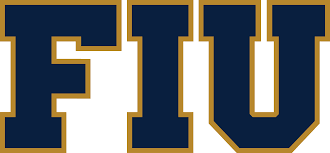

In [54]:
Image(filename= 'FIU logo.png', width= 200, height= 400)


# <br> Demographic Disparity in Covid-19 and Economic Data Post Pandemic.










<br>

***

## Lavenant Matthias, and Sebastian Redondo(2023). 

    Economics Department,Steven J. Green School of International & Public Affairs, FIU.


***

<div class="alert alert-block alert-success">
<b>Table of Contents<b>
</div>

1. External python Libreries 

2. Intro

3. Data 

    3.1 Description of the Data
    
    3.2 Subsamples
    
    3.3 Correlation
    
    3.4 Method for Imputations & Dropping NaN
    
    3.5 Summary Statistics No Imputations
    
    3.6 Plots & Graphs Dropping NaN
    
    3.7 Summary Statistics with Imputations
    
    3.8 Plots & Graphs With Imputations

3. Models 

4. Conclusion

<div class="alert alert-block alert-success">
<b>Introduction<b>
</div>

<div class="alert alert-block alert-success">
<b>Data<b>
</div>

## Description of the Data

 The data was sourced from the US Census' Household Pulse Survey Public Use Files (UCHPS-PUF) PUF release week 48, week 35 and week 24.
<br>
 
We picked these releases because they measure the trends of the economy and the effectivenes of the vaccine, political governance of a state, and the mindset of the population sampled.


<br> **The US Census Bureau's Household Pulse Survey Public Use Files (UCHPS-PUF)**

Is a dataset that has been generated from the survey known as The Household Pulse Survey. This survey was designed to collect information on the social and economic status of individuals and households in the United States following the COVID-19 pandemic.

The UCHPS-PUF contains anonymized responses from the Household Pulse Survey and provides a valuable resource for researchers and policymakers to analyze the impact of the pandemic on various aspects of life. The dataset has been collected from individuals and households in all 50 US states, and the survey was conducted weekly, beginning in April 2020.

The survey covers a broad range of topics that are relevant to the post-pandemic environment, such as employment status, income loss, food security, housing stability, and access to healthcare. The Household Pulse Survey is an essential tool for understanding the social and economic effects of the COVID-19 pandemic on households in the United States.

Given its broad coverage of topics, the UCHPS-PUF dataset provides a unique opportunity for researchers to analyze the impact of the pandemic across a variety of domains. This data has the potential to inform policy decisions and support interventions aimed at mitigating the negative effects of the pandemic on individuals and households.

<br>
    
    
    
    
    
    
    
 
    
    
    
  

## Sample & Sub-samples

The general dataframe comes from the Week 48 PUF release, the shape of the dataset is 46802 rows and 240 columns. In this general dataset, there are certain columns(questions) that have missing values (NaN), thus it is necessary to clean the data by making sub-samples and imputing the missing values using a Decision Tree Regression.

The method of analysis for the data was created by first creating a sub-sample in which we renamed some variables and choose the one with the least missing values, we also selected variables with a high correlation with our dependent variable (Vaccination), after finding the variables with a strong correlation with our dependent variable we filter them creating a new sub-sample, using the information in this dataset we are able to analyse the data using only the variables that have a recorded value.


<br>




<div class="alert alert-block alert-success">
<b>Hypothesis<b>
</div>

### Question 1
* If different groups of individual that share a common characteristic are getting vaccinated at the same rate as other groups in the sub-Sample.

* Check if states that voted blue or red took the vaccine at the same proportion.

    * what were the vaccination pattern between the individuals with a higher education compared to other individuals in different educational groups.
        * The sub-sample was created by clearing the field, selecting the variables in question and dropping the columns that have a high number of questions not answered (NaN).
    
        * It is important to highlight that most of the people in the subsample were highly educated or at least have some collgue or an AA  as you can see from figure 5.



## DataSet 1. (General Sample)

In [55]:
data= 'pulse2022_puf_48.csv'

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
dfweek48= pd.read_csv(data, na_values=["-88","-99"],engine='python')

In [58]:
dfweek48

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,EGENID_BIRTH,AGENID_BIRTH,GENID_DESCRIBE,SEXUAL_ORIENTATION,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,ENRPUBCHK,ENRPRVCHK,ENRHMSCHK,TENROLLPUB,TENROLLPRV,TENROLLHMSCH,ENROLLNONE,ACTVDUTY1,ACTVDUTY2,ACTVDUTY3,ACTVDUTY4,ACTVDUTY5,RECVDVACC,NUMDOSES,BOOSTERRV,WHYNOBSTR1,WHYNOBSTR2,WHYNOBSTR3,WHYNOBSTR4,WHYNOBSTR5,WHYNOBSTR6,WHYNOBSTR7,WHYNOBSTR8,WHYNOBSTR9,KIDDOSESRV,KIDDOSESRV_LT5Y,KIDDOSESRV_5_11Y,KIDDOSESRV_12_17Y,KIDBSTR_LT5Y,KIDBSTR_5_11Y,KIDBSTR_12_17Y,KIDGETVAC_LT5Y,KIDGETVAC_5_11Y,KIDGETVAC_12_17Y,KIDWHYNO1,KIDWHYNO2,KIDWHYNO3,KIDWHYNO4,KIDWHYNO5,KIDWHYNO6,KIDWHYNO7,KIDWHYNO8,KIDWHYNO9,KIDWHYNO10,KIDWHYNO11,KIDWHYNO12,KIDWHYNO13,KIDWHYNO14,HADCOVIDRV,WHENCOVID,TREATORAL,TREATMONO,RSNNOTREAT1,RSNNOTREAT2,RSNNOTREAT3,RSNNOTREAT4,RSNNOTREAT5,RSNNOTREAT6,RSNNOTREAT7,RSNNOTREAT8,RSNNOTREAT9,RSNNOTREAT10,SYMPTOMS,LONGCOVID,SYMPTMNOW,WRKLOSSRV,ANYWORK,KINDWORK,RSNNOWRKRV,WKVOL,SETTING,UI_APPLYRV,UI_RECVRV,UI_RECVNOW,CHLDCARE,CHLDIMPCT1,CHLDIMPCT2,CHLDIMPCT3,CHLDIMPCT4,CHLDIMPCT5,CHLDIMPCT6,CHLDIMPCT7,CHLDIMPCT8,CHLDIMPCT9,CTC_CLAIM,CTC_REFUND,CTC_USE,CTCSPND1,CTCSPND2,CTCSPND3,CTCSPND4,CTCSPND5,CTCSPND6,CTCSPND7,CTCSPND8,CTCSPND9,CTCSPND10,CTCSPND11,CTCSPND12,CTCSPND13,CTCSPND14,CTCSPND15,CTCSPND16,CTCSPND17,EXPNS_DIF,TWDAYS,SPND_SRC1,SPND_SRC2,SPND_SRC3,SPND_SRC4,SPND_SRC5,SPND_SRC6,SPND_SRC7,SPND_SRC8,SPND_SRC9,SPND_SRC10,SPND_SRC11,SPND_SRC12,TSPNDFOOD,TSPNDPRPD,CURFOODSUF,CHILDFOOD,FOODRSNRV1,FOODRSNRV2,FOODRSNRV3,FOODRSNRV4,FREEFOOD,SCHLFDHLP1,SCHLFDHLP2,SCHLFDHLP3,SCHLFDHLP4,NOSCHLFDHLP,SNAP_YN,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,TELEHLTH,TH_ADLT_PHON,TH_ADLT_VID,TELECHLD,TH_CHLD_PHON,TH_CHLD_VID,KIDBHVR1,KIDBHVR2,KIDBHVR3,KIDBHVR4,KIDBHVR5,KIDBHVR6,KIDBHVR7,KIDBHVR8,KIDBHVR9,SEEING,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,TENURE,TRENTAMT,RENTCHNG,LIVQTRRV,RENTCUR,MORTCUR,TMNTHSBHND,RENTASSIST,EVICT,FORCLOSE,ENERGY,HSE_TEMP,ENRGY_BILL,PRVRIDESHR,FEWRTRANS,RCVEDUC1,RCVEDUC2,RCVEDUC3,RCVEDUC4,RCVEDUC5,RCVEDUC6,RCVEDUC7,RCVEDUC8,RCVEDUC9,LEARNFMT,SCHLHRS,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V480000001,48,41,NaN,4,1411.203878,1261.919425,1946,2,1,2,1,2,5,2,3.0,2,2,2.0,2.0,1,2,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,1.0,1.0,3.0,2274.0,5.0,6.0,1.0,NaN,NaN,4.0,NaN,NaN,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,V480000002,48,31,NaN,3,1021.299839,3735.204079,1958,2,1,2,1,2,5,2,1.0,1,2,1.0,2.0,4,2,0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [59]:
pd.set_option('display.max_rows', 30)

In [60]:
dfweek48['RECVDVACC'].value_counts().sort_index()

1.0    40575
2.0     5884
Name: RECVDVACC, dtype: int64

In [61]:
dfweek48['TSPNDPRPD'].isnull().sum() 

6236

In [62]:
dfweek48.count()

SCRAM        46801
WEEK         46801
EST_ST       46801
EST_MSA      14010
REGION       46801
             ...  
PSWHYCHG6      312
PSWHYCHG7      542
PSWHYCHG8      967
PSWHYCHG9      428
INCOME       37405
Length: 240, dtype: int64

In [63]:
dfweek48.shape

(46801, 240)

In [64]:
dfweek48.rename(columns = {'TBIRTH_YEAR':'BIRTH_YEAR', 'RHISPANIC':'HISPANIC_ORG', 'EEDUC':'EDUCATION','RRACE':'RACE', 'MS':'MARITAL_STATUS','EGENID_BIRTH':'SEX', 'GENID_DESCRIBE':'GENDER', 'SEXUAL_ORIENTATION':'SEX_ORI','THHLD_NUMPER':'HOUSEHOLD_SIZE', 'THHLD_NUMKID':'NUM_KIDS_HOUSE', 'LEARNFMT':'LEARN_FORMAT'}, inplace = True)

In [65]:
dfweek48

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,BIRTH_YEAR,ABIRTH_YEAR,HISPANIC_ORG,AHISPANIC,RACE,ARACE,EDUCATION,AEDUC,MARITAL_STATUS,SEX,AGENID_BIRTH,GENDER,SEX_ORI,HOUSEHOLD_SIZE,AHHLD_NUMPER,NUM_KIDS_HOUSE,AHHLD_NUMKID,THHLD_NUMADLT,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,ENRPUBCHK,ENRPRVCHK,ENRHMSCHK,TENROLLPUB,TENROLLPRV,TENROLLHMSCH,ENROLLNONE,ACTVDUTY1,ACTVDUTY2,ACTVDUTY3,ACTVDUTY4,ACTVDUTY5,RECVDVACC,NUMDOSES,BOOSTERRV,WHYNOBSTR1,WHYNOBSTR2,WHYNOBSTR3,WHYNOBSTR4,WHYNOBSTR5,WHYNOBSTR6,WHYNOBSTR7,WHYNOBSTR8,WHYNOBSTR9,KIDDOSESRV,KIDDOSESRV_LT5Y,KIDDOSESRV_5_11Y,KIDDOSESRV_12_17Y,KIDBSTR_LT5Y,KIDBSTR_5_11Y,KIDBSTR_12_17Y,KIDGETVAC_LT5Y,KIDGETVAC_5_11Y,KIDGETVAC_12_17Y,KIDWHYNO1,KIDWHYNO2,KIDWHYNO3,KIDWHYNO4,KIDWHYNO5,KIDWHYNO6,KIDWHYNO7,KIDWHYNO8,KIDWHYNO9,KIDWHYNO10,KIDWHYNO11,KIDWHYNO12,KIDWHYNO13,KIDWHYNO14,HADCOVIDRV,WHENCOVID,TREATORAL,TREATMONO,RSNNOTREAT1,RSNNOTREAT2,RSNNOTREAT3,RSNNOTREAT4,RSNNOTREAT5,RSNNOTREAT6,RSNNOTREAT7,RSNNOTREAT8,RSNNOTREAT9,RSNNOTREAT10,SYMPTOMS,LONGCOVID,SYMPTMNOW,WRKLOSSRV,ANYWORK,KINDWORK,RSNNOWRKRV,WKVOL,SETTING,UI_APPLYRV,UI_RECVRV,UI_RECVNOW,CHLDCARE,CHLDIMPCT1,CHLDIMPCT2,CHLDIMPCT3,CHLDIMPCT4,CHLDIMPCT5,CHLDIMPCT6,CHLDIMPCT7,CHLDIMPCT8,CHLDIMPCT9,CTC_CLAIM,CTC_REFUND,CTC_USE,CTCSPND1,CTCSPND2,CTCSPND3,CTCSPND4,CTCSPND5,CTCSPND6,CTCSPND7,CTCSPND8,CTCSPND9,CTCSPND10,CTCSPND11,CTCSPND12,CTCSPND13,CTCSPND14,CTCSPND15,CTCSPND16,CTCSPND17,EXPNS_DIF,TWDAYS,SPND_SRC1,SPND_SRC2,SPND_SRC3,SPND_SRC4,SPND_SRC5,SPND_SRC6,SPND_SRC7,SPND_SRC8,SPND_SRC9,SPND_SRC10,SPND_SRC11,SPND_SRC12,TSPNDFOOD,TSPNDPRPD,CURFOODSUF,CHILDFOOD,FOODRSNRV1,FOODRSNRV2,FOODRSNRV3,FOODRSNRV4,FREEFOOD,SCHLFDHLP1,SCHLFDHLP2,SCHLFDHLP3,SCHLFDHLP4,NOSCHLFDHLP,SNAP_YN,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,TELEHLTH,TH_ADLT_PHON,TH_ADLT_VID,TELECHLD,TH_CHLD_PHON,TH_CHLD_VID,KIDBHVR1,KIDBHVR2,KIDBHVR3,KIDBHVR4,KIDBHVR5,KIDBHVR6,KIDBHVR7,KIDBHVR8,KIDBHVR9,SEEING,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,TENURE,TRENTAMT,RENTCHNG,LIVQTRRV,RENTCUR,MORTCUR,TMNTHSBHND,RENTASSIST,EVICT,FORCLOSE,ENERGY,HSE_TEMP,ENRGY_BILL,PRVRIDESHR,FEWRTRANS,RCVEDUC1,RCVEDUC2,RCVEDUC3,RCVEDUC4,RCVEDUC5,RCVEDUC6,RCVEDUC7,RCVEDUC8,RCVEDUC9,LEARN_FORMAT,SCHLHRS,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V480000001,48,41,NaN,4,1411.203878,1261.919425,1946,2,1,2,1,2,5,2,3.0,2,2,2.0,2.0,1,2,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,1.0,1.0,3.0,2274.0,5.0,6.0,1.0,NaN,NaN,4.0,NaN,NaN,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,V480000002,48,31,NaN,3,1021.299839,3735.204079,1958,2,1,2,1,2,5,2,1.0,1,2,1.0,2.0,4,2,0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [66]:
dfweek48.isnull().sum() 

SCRAM            0
WEEK             0
EST_ST           0
EST_MSA      32791
REGION           0
             ...  
PSWHYCHG6    46489
PSWHYCHG7    46259
PSWHYCHG8    45834
PSWHYCHG9    46373
INCOME        9396
Length: 240, dtype: int64

In [67]:
df101 = dfweek48[['SCRAM', 'HWEIGHT', 'PWEIGHT', 'BIRTH_YEAR', 'EST_ST','HISPANIC_ORG', 'RACE', 'EDUCATION','MARITAL_STATUS','SEX','GENDER','SEX_ORI','INCOME','HOUSEHOLD_SIZE','NUM_KIDS_HOUSE','RECVDVACC','NUMDOSES','BOOSTERRV','HADCOVIDRV','TSPNDFOOD','TSPNDPRPD','FREEFOOD','ANXIOUS','WORRY','INTEREST','DOWN','SELFCARE','HLTHINS1','PRIVHLTH','PUBHLTH','TELEHLTH','TENURE','LIVQTRRV','ENERGY','ENRGY_BILL']]

In [68]:
df101

,SCRAM,HWEIGHT,PWEIGHT,BIRTH_YEAR,EST_ST,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,INCOME,HOUSEHOLD_SIZE,NUM_KIDS_HOUSE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,TSPNDFOOD,TSPNDPRPD,FREEFOOD,ANXIOUS,WORRY,INTEREST,DOWN,SELFCARE,HLTHINS1,PRIVHLTH,PUBHLTH,TELEHLTH,TENURE,LIVQTRRV,ENERGY,ENRGY_BILL
0,V480000001,1411.203878,1261.919425,1946,41,1,1,5,3.0,2,2.0,2.0,2.0,1,0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,3.0,6.0,4.0,4.0
1,V480000002,1021.299839,3735.204079,1958,31,1,1,5,1.0,1,1.0,2.0,NaN,4,0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN
2,V480000003,13111.143310,49438.385982,1971,17,2,1,3,4.0,2,2.0,4.0,1.0,6,2,1.0,1.0,1.0,2.0,550.0,75.0,2.0,4.0,3.0,2.0,3.0,1.0,2.0,2,2,1.0,3.0,2.0,2.0,2.0
3,V480000004,2123.268644,10637.705782,1967,13,1,2,7,2.0,2,2.0,2.0,4.0,6,1,1.0,2.0,1.0,1.0,300.0,260.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1,2,2.0,2.0,2.0,4.0,4.0
4,V480000005,343.061621,1357.461102,1977,33,1,1,6,3.0,2,2.0,2.0,2.0,5,1,1.0,1.0,1.0,2.0,850.0,50.0,2.0,3.0,3.0,2.0,1.0,1.0,NaN,3,1,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,V480046797,1982.875210,3973.730437,1993,13,1,1,6,1.0,2,2.0,2.0,4.0,2,0,1.0,2.0,1.0,1.0,500.0,50.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,1,2,2.0,2.0,2.0,3.0,4.0
46797,V480046798,4244.617883,3938.132319,1992,37,1,4,6,2.0,2,2.0,2.0,NaN,5,4,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN
46798,V480046799,6199.383705,5955.473764,1940,55,1,1,3,2.0,2,2.0,2.0,2.0,1,0,1.0,2.0,2.0,2.0,138.0,11.0,2.0,3.0,2.0,4.0,4.0,2.0,1.0,1,1,NaN,2.0,2.0,2.0,3.0
46799,V480046800,167.238290,327.723025,1961,2,1,1,4,1.0,2,2.0,2.0,4.0,4,2,2.0,NaN,NaN,1.0,700.0,0.0,2.0,4.0,4.0,2.0,4.0,3.0,1.0,1,2,1.0,2.0,2.0,4.0,4.0


In [69]:
df101.isnull().sum() 

SCRAM            0
HWEIGHT          0
PWEIGHT          0
BIRTH_YEAR       0
EST_ST           0
              ... 
TELEHLTH      6621
TENURE        7681
LIVQTRRV      7845
ENERGY        8095
ENRGY_BILL    8077
Length: 35, dtype: int64

# Summary Statistics 

In [70]:
df101[['SCRAM', 'HWEIGHT', 'PWEIGHT', 'BIRTH_YEAR', 'EST_ST','HISPANIC_ORG', 'RACE', 'EDUCATION','MARITAL_STATUS','SEX','GENDER','SEX_ORI','HOUSEHOLD_SIZE','NUM_KIDS_HOUSE','RECVDVACC','NUMDOSES','BOOSTERRV','HADCOVIDRV','TSPNDFOOD','TSPNDPRPD','FREEFOOD','ANXIOUS','WORRY','INTEREST','DOWN','SELFCARE','HLTHINS1','PRIVHLTH','PUBHLTH','TELEHLTH','TENURE','LIVQTRRV','ENERGY','ENRGY_BILL']].describe()

,HWEIGHT,PWEIGHT,BIRTH_YEAR,EST_ST,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,NUM_KIDS_HOUSE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,TSPNDFOOD,TSPNDPRPD,FREEFOOD,ANXIOUS,WORRY,INTEREST,DOWN,SELFCARE,HLTHINS1,PRIVHLTH,PUBHLTH,TELEHLTH,TENURE,LIVQTRRV,ENERGY,ENRGY_BILL
count,46801.000000,46801.000000,46801.000000,46801.000000,46801.000000,46801.000000,46801.000000,46481.000000,46801.000000,46372.000000,46139.000000,46801.000000,46801.000000,46459.000000,40197.000000,40498.000000,46190.000000,40924.000000,40565.000000,41285.000000,40769.000000,40712.000000,40705.000000,40728.000000,39701.000000,39561.000000,46801.000000,46801.000000,40180.000000,39120.00000,38956.000000,38706.000000,38724.000000
mean,2656.896434,5394.778124,1971.420589,28.600991,1.086708,1.334480,5.291233,2.300037,1.581547,1.617291,2.093240,2.736224,0.634516,1.126649,1.593975,1.220974,1.560966,253.040172,107.584346,1.959356,1.953519,1.776724,1.684117,1.679459,1.083776,1.319557,1.486891,1.869640,1.772101,2.02454,2.775080,3.487702,3.687558
std,4270.288401,9747.244412,16.067902,16.352824,0.281409,0.797084,1.471644,1.643336,0.493310,0.564088,0.530383,1.510226,1.053356,0.332583,0.491095,0.414908,0.496275,178.885659,115.320078,0.197467,1.028858,0.973809,0.918002,0.922811,0.325776,0.466311,0.757050,0.708792,0.419483,0.75228,1.512649,0.949230,0.763667
min,49.775274,50.824481,1934.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,803.289604,1334.809101,1958.000000,13.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,140.000000,30.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.00000,2.000000,3.000000,4.000000
50%,1452.593401,2664.513949,1971.000000,28.000000,1.000000,1.000000,6.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,200.000000,75.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,4.000000,4.000000
75%,2834.564744,5568.778863,1985.000000,44.000000,1.000000,1.000000,7.000000,3.000000,2.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,300.000000,150.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.00000,3.000000,4.000000,4.000000
max,283980.840920,370162.735680,2004.000000,56.000000,2.000000,4.000000,7.000000,5.000000,2.000000,4.000000,5.000000,10.000000,5.000000,2.000000,2.000000,2.000000,2.000000,900.000000,500.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,2.000000,4.00000,7.000000,4.000000,4.000000


In [71]:
pd.set_option('display.max_rows', 30)

# Correlation Matrix

In [72]:
df101.corr()

,HWEIGHT,PWEIGHT,BIRTH_YEAR,EST_ST,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,INCOME,HOUSEHOLD_SIZE,NUM_KIDS_HOUSE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,TSPNDFOOD,TSPNDPRPD,FREEFOOD,ANXIOUS,WORRY,INTEREST,DOWN,SELFCARE,HLTHINS1,PRIVHLTH,PUBHLTH,TELEHLTH,TENURE,LIVQTRRV,ENERGY,ENRGY_BILL
HWEIGHT,1.000000,0.851838,0.054115,-0.024789,0.143848,0.058821,-0.365281,0.084248,-0.079079,-0.058468,0.015559,-0.163032,0.025149,0.017649,0.077174,-0.054382,0.079355,0.006382,0.018498,0.014206,-0.051070,0.024872,0.047893,0.050346,0.046218,0.032279,0.078542,0.101712,0.018155,0.000335,0.069181,0.049556,-0.093944,-0.087610
PWEIGHT,0.851838,1.000000,0.078800,-0.032861,0.168625,0.064893,-0.342452,0.043326,-0.077138,-0.051095,0.028995,-0.112973,0.220344,0.045555,0.080456,-0.049491,0.083535,-0.013872,0.078334,0.048672,-0.067396,0.031533,0.052921,0.049626,0.047260,0.035301,0.063081,0.102957,0.039339,-0.000236,0.044593,-0.006102,-0.104980,-0.092166
BIRTH_YEAR,0.054115,0.078800,1.000000,0.019860,0.104338,0.099076,-0.038581,0.305475,0.021274,0.048428,0.137384,0.019249,0.260722,0.296964,0.123647,0.078881,0.205911,-0.186094,0.131056,0.124199,-0.003306,0.257277,0.204986,0.170877,0.185482,-0.006042,-0.217202,-0.017966,0.340656,0.044839,0.364589,0.160619,-0.110483,-0.103000
EST_ST,-0.024789,-0.032861,0.019860,1.000000,-0.060626,-0.045931,-0.001946,-0.023769,-0.001688,-0.000122,0.011524,-0.006917,0.003609,0.009555,0.009634,0.010543,0.014535,0.006770,-0.022731,-0.029622,0.019731,-0.004007,-0.010360,-0.004337,-0.011795,0.000553,-0.010731,-0.018381,0.008039,0.024294,-0.017699,-0.030149,0.005724,0.011205
HISPANIC_ORG,0.143848,0.168625,0.104338,-0.060626,1.000000,0.050076,-0.111489,0.042350,0.010017,0.018833,0.041253,-0.076106,0.104447,0.075121,0.012187,-0.055605,0.035163,-0.053330,0.095341,0.071966,-0.063303,0.039321,0.052917,0.040874,0.035244,0.026876,0.023521,0.056688,0.042208,-0.027455,0.077239,0.047251,-0.097026,-0.082423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TELEHLTH,0.000335,-0.000236,0.044839,0.024294,-0.027455,-0.035918,-0.008741,-0.019689,-0.055091,-0.066498,-0.023671,0.045887,0.019845,0.024223,0.052885,0.039403,0.045259,0.033668,-0.040947,-0.022578,0.062044,-0.120464,-0.118451,-0.107556,-0.112115,-0.113976,-0.005685,-0.014772,0.067693,1.000000,-0.035985,-0.048626,0.077348,0.075952
TENURE,0.069181,0.044593,0.364589,-0.017699,0.077239,0.091758,-0.115473,0.284299,0.034702,0.054879,0.081682,-0.220137,0.002118,0.067849,0.055886,0.005418,0.111423,-0.064966,-0.001766,0.001327,-0.089811,0.212698,0.196285,0.185599,0.195118,0.077384,-0.001824,0.049024,0.098158,-0.035985,1.000000,0.480530,-0.158527,-0.180658
LIVQTRRV,0.049556,-0.006102,0.160619,-0.030149,0.047251,0.086762,-0.013096,0.324926,-0.000868,0.020484,0.047794,-0.200651,-0.226296,-0.136684,-0.039790,0.005017,-0.002313,0.011899,-0.121637,-0.034624,-0.052374,0.101686,0.093785,0.098254,0.109919,0.057660,0.044595,0.056844,0.012774,-0.048626,0.480530,1.000000,-0.041548,-0.053953
ENERGY,-0.093944,-0.104980,-0.110483,0.005724,-0.097026,-0.089205,0.250204,-0.112204,-0.068731,-0.082414,-0.065433,0.354137,-0.110524,-0.108568,-0.156008,0.088318,-0.164250,0.039600,-0.120791,0.025139,0.191983,-0.334510,-0.375470,-0.340722,-0.343626,-0.194249,-0.142327,-0.166596,0.061052,0.077348,-0.158527,-0.041548,1.000000,0.589747


# Data Base Cleaned by dropping all NaN Values

This subsample filters the questions with the most answers and removes the missing values (NaN)

In [73]:
df101.dropna() 

,SCRAM,HWEIGHT,PWEIGHT,BIRTH_YEAR,EST_ST,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,INCOME,HOUSEHOLD_SIZE,NUM_KIDS_HOUSE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,TSPNDFOOD,TSPNDPRPD,FREEFOOD,ANXIOUS,WORRY,INTEREST,DOWN,SELFCARE,HLTHINS1,PRIVHLTH,PUBHLTH,TELEHLTH,TENURE,LIVQTRRV,ENERGY,ENRGY_BILL
0,V480000001,1411.203878,1261.919425,1946,41,1,1,5,3.0,2,2.0,2.0,2.0,1,0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,3.0,6.0,4.0,4.0
2,V480000003,13111.143310,49438.385982,1971,17,2,1,3,4.0,2,2.0,4.0,1.0,6,2,1.0,1.0,1.0,2.0,550.0,75.0,2.0,4.0,3.0,2.0,3.0,1.0,2.0,2,2,1.0,3.0,2.0,2.0,2.0
3,V480000004,2123.268644,10637.705782,1967,13,1,2,7,2.0,2,2.0,2.0,4.0,6,1,1.0,2.0,1.0,1.0,300.0,260.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1,2,2.0,2.0,2.0,4.0,4.0
5,V480000006,2052.005316,2061.157614,1994,8,1,1,6,5.0,2,2.0,1.0,4.0,1,0,1.0,2.0,2.0,1.0,100.0,0.0,2.0,4.0,4.0,3.0,4.0,1.0,1.0,1,2,1.0,3.0,6.0,2.0,2.0
6,V480000007,32794.017863,86663.347138,1958,36,1,2,2,1.0,2,2.0,2.0,2.0,4,1,1.0,1.0,1.0,2.0,235.0,0.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0,1,1,2.0,3.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46793,V480046794,1199.874836,2306.842945,1990,51,1,3,7,1.0,2,2.0,2.0,7.0,3,1,1.0,2.0,1.0,2.0,40.0,270.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1,2,1.0,2.0,3.0,4.0,4.0
46794,V480046795,913.579065,859.156201,1991,10,1,1,4,5.0,2,2.0,2.0,3.0,1,0,1.0,2.0,2.0,2.0,58.0,17.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2,2,2.0,3.0,6.0,4.0,4.0
46795,V480046796,16721.042461,29458.655403,1985,36,1,1,3,5.0,2,2.0,2.0,5.0,4,2,1.0,2.0,1.0,1.0,225.0,75.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1,2,2.0,2.0,2.0,4.0,4.0
46796,V480046797,1982.875210,3973.730437,1993,13,1,1,6,1.0,2,2.0,2.0,4.0,2,0,1.0,2.0,1.0,1.0,500.0,50.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,1,2,2.0,2.0,2.0,3.0,4.0


<div class="alert alert-block alert-success">
<b>Sex<b>
</div>

Male- 1

female- 2

In [74]:
len(df101['SEX'])

46801

In [75]:
df101['SEX'].value_counts()

2    27217
1    19584
Name: SEX, dtype: int64

In [76]:
NUM_MALE= (df101['SEX']==1).sum()
NUM_MALE

19584

In [77]:
NUM_FEMALE= (df101['SEX']==2).sum()
NUM_FEMALE

27217

In [78]:
PER_MALE= (df101['SEX']==1).sum() / len(df101['SEX'])
PER_MALE

0.4184525971667272

In [79]:
PER_FEMALE= 1 - PER_MALE
PER_FEMALE

0.5815474028332728

<div class="alert alert-block alert-success">
<b>Sexual Orientation<b>
</div>

Gay or Lesbian- 1

straight- 2

Bisexual- 3 

Something Else- 4

In [81]:
df101['SEX_ORI'].value_counts()

2.0    40790
3.0     2148
1.0     1639
4.0      893
5.0      669
Name: SEX_ORI, dtype: int64

In [82]:
Gay_lesbi= (df101['SEX_ORI']==1).sum()
Straight= (df101['SEX_ORI']==2).sum()
Bisexual= (df101['SEX_ORI']==3).sum()
Some_else= (df101['SEX_ORI']==4).sum()
I_DONT_K= (df101['SEX_ORI']==5).sum()

---

<div class="alert alert-block alert-success">
<b>Graphs Distribution of Data<b>
</div>

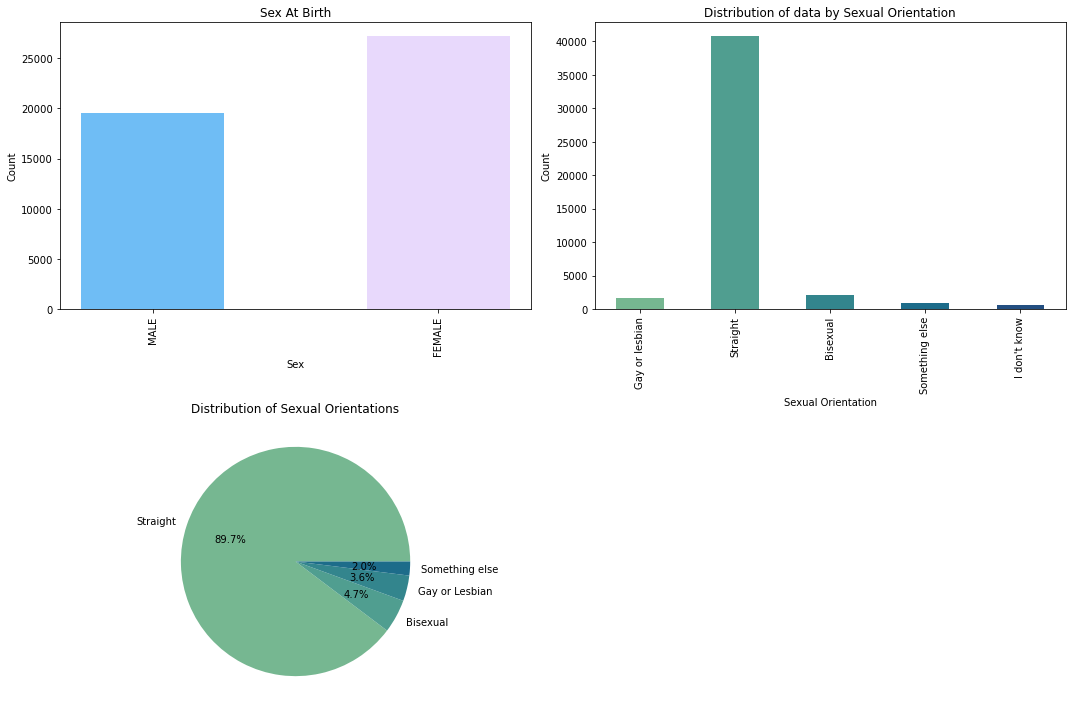

In [228]:
# Data for the first bar chart
warm1 = '#6fbdf5'
warm2 = '#E8D9FC'
colors0 = [warm1, warm2]
sex_labels = ['MALE', 'FEMALE']
sex_counts = [NUM_MALE, NUM_FEMALE]

# Data for the second bar chart
colors1 = sns.color_palette("crest", n_colors=5)
orientation_labels = ['Gay or lesbian', 'Straight', 'Bisexual', 'Something else', "I don't know"]
orientation_counts = [Gay_lesbi, Straight, Bisexual, Some_else, I_DONT_K]

# Set up the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the first bar chart
axs[0, 0].bar(sex_labels, sex_counts, width=0.5, color=colors0)
axs[0, 0].set_xlabel('Sex')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Sex At Birth')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot the second bar chart
axs[0, 1].bar(orientation_labels, orientation_counts, width=0.5, color=colors1)
axs[0, 1].set_xlabel('Sexual Orientation')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Distribution of data by Sexual Orientation')
axs[0, 1].tick_params(axis='x', rotation=90)

# Include the third graph
sex_ori_mapping = {1: 'Gay or Lesbian', 2: 'Straight', 3: 'Bisexual', 4: 'Something else'}
df101['SEX_ORI_NEW'] = df101['SEX_ORI'].map(sex_ori_mapping)
df101 = df101[~df101['SEX_ORI'].isin([-99, -88])]
sex_ori_counts = df101['SEX_ORI_NEW'].value_counts()
axs[1, 0].pie(sex_ori_counts.values, colors=colors1, labels=sex_ori_counts.index, autopct='%1.1f%%')
axs[1, 0].set_title('Distribution of Sexual Orientations')

# Remove the empty plot in the second row
fig.delaxes(axs[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


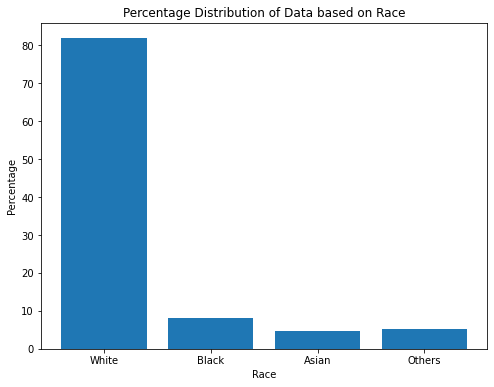

In [214]:
dfvac = dfweek48.loc[:, ['SCRAM', 'BIRTH_YEAR', 'EST_ST', 'INCOME', 'HISPANIC_ORG', 'RACE', 'EDUCATION',
                         'MARITAL_STATUS', 'SEX', 'GENDER', 'SEX_ORI', 'HOUSEHOLD_SIZE', 'RECVDVACC', 'NUMDOSES',
                         'BOOSTERRV', 'HADCOVIDRV', 'PRIVHLTH', 'PUBHLTH']]

race_mapping = {1: 'White', 2: 'Black', 3: 'Asian', 4: 'Others'}
dfvac['RACE'] = dfvac['RACE'].map(race_mapping)
race_counts = dfvac['RACE'].value_counts()

total_count = race_counts.sum()
race_percentages = (race_counts / total_count) * 100
race_categories = ['White', 'Black', 'Asian', 'Others']
percentage_values = race_percentages.loc[race_categories]
plt.figure(figsize=(8, 6))
plt.bar(race_categories, percentage_values)
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Data based on Race')
plt.show()

<div class="alert alert-block alert-success">
<b>Percentage Distribution of Data based on Income Range<b>
</div>

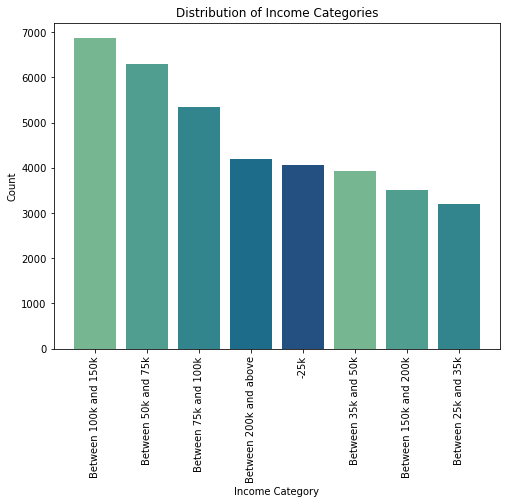

In [212]:
colors1 = sns.color_palette("crest", n_colors=5)

income_mapping = {1: '-25k',
                  2: 'Between 25k and 35k',
                  3: 'Between 35k and 50k',
                  4: 'Between 50k and 75k',
                  5: 'Between 75k and 100k',
                  6: 'Between 100k and 150k',
                  7: 'Between 150k and 200k',
                  8: 'Between 200k and above'}


df101['INCOME_CATEGORY'] = df101['INCOME'].map(income_mapping)


df101 = df101[(df101['INCOME'] != -99) & (df101['INCOME'] != -88)]


income_counts = df101['INCOME_CATEGORY'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(income_counts.index, income_counts.values, color=colors1)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
<b>COVID-19<b>
</div>

43% of the individuals in the sample had covid at the time of the survey

In [87]:
df101['HADCOVIDRV'].value_counts()

2.0    25911
1.0    20279
Name: HADCOVIDRV, dtype: int64

In [88]:
df101.shape

(46801, 37)

In [89]:
POSITIVE19 = (df101['HADCOVIDRV'] == 1.0).sum()/len(df101['HADCOVIDRV'])
POSITIVE19

0.43330270720711095

In [90]:
NEGATIVE19= (df101['HADCOVIDRV'] == 2.0).sum()/len(df101['HADCOVIDRV'])
NEGATIVE19

0.5536420161962351

In [91]:
PER_CO19_POS=  POSITIVE19 / len(df101['HADCOVIDRV'])
PER_CO19_POS

9.258407025642849e-06

<div class="alert alert-block alert-success">
<b>COVID-19 Testing 
</div>

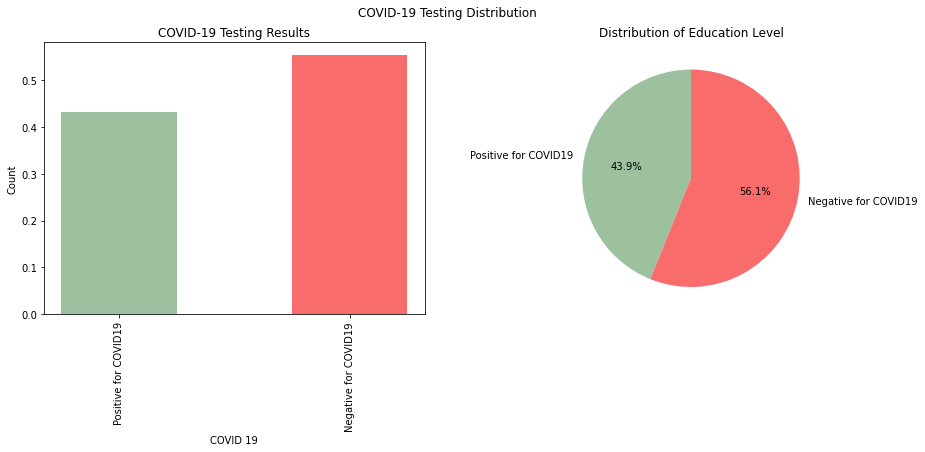

In [246]:
pos= '#9dc19f'
neg='#f86c6c'

colors2= [pos,neg]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
axs[0].bar(['Positive for COVID19', 'Negative for COVID19'], [POSITIVE19, NEGATIVE19], width=0.5, color=colors2)
axs[0].set_xlabel('COVID 19')
axs[0].set_ylabel('Count')
axs[0].set_title('COVID-19 Testing Results')
axs[0].tick_params(axis='x', rotation=90)


labels = ['Positive for COVID19', 'Negative for COVID19']
sizes = [POSITIVE19, NEGATIVE19]
axs[1].pie(sizes, labels=labels, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution of Education Level')


fig.suptitle("COVID-19 Testing Distribution ")


plt.show()

<div class="alert alert-block alert-success">
<b>EDUCATION
</div>

**Less than high school-** 1:2

**High school or GED-** 3

**Some college/associate’s degree-** 4:5

**Bachelor’s degree or higher-** 6:7


When making inferences about the data is important to understand that not all the groups with different levels of education are proportionally represented.

In [93]:
EDU=len(df101['EDUCATION'])

In [94]:
df101['EDUCATION'].value_counts()

6    13203
7    12288
4     9937
3     5433
5     4930
2      694
1      316
Name: EDUCATION, dtype: int64

In [95]:
MOST_EDUC= (df101['EDUCATION']==6).sum() + (df101['EDUCATION']==7).sum()
MOST_EDUC

25491

In [96]:
PER_MOST_EDUC = MOST_EDUC/ EDU # per of individuals that are Highly educated in the subsample
PER_MOST_EDUC

0.5446678489775859

**54.5% of the individuals in the sample are highly educated**

In [97]:
SOME_COLL_AA= (df101['EDUCATION']==4).sum() + (df101['EDUCATION']==5).sum()
SOME_COLL_AA

14867

In [98]:
PER_SOME_COLL_AA= SOME_COLL_AA/ EDU
PER_SOME_COLL_AA

0.31766415247537444

**31.8% of the individuals in the sample have some collegue or an AA**

In [99]:
HIGHSC= (df101['EDUCATION']==3).sum()
HIGHSC

5433

In [100]:
PER_HIHGSC= HIGHSC/ EDU
PER_HIHGSC

0.11608726309266897

**11% of individuals have only a High School Degree**

In [101]:
LESS_HS= (df101['EDUCATION']==1).sum() + (df101['EDUCATION']==2).sum()
LESS_HS

1010

In [102]:
PER_LESS_HS= LESS_HS/ EDU
PER_LESS_HS

0.02158073545437063

**2% of the individuals in the subsample have less than a High School Degree**

<div class="alert alert-block alert-success">
<b>Bar Chart & Pie chart of the education distribution in the sample - Figure 5 
</div>

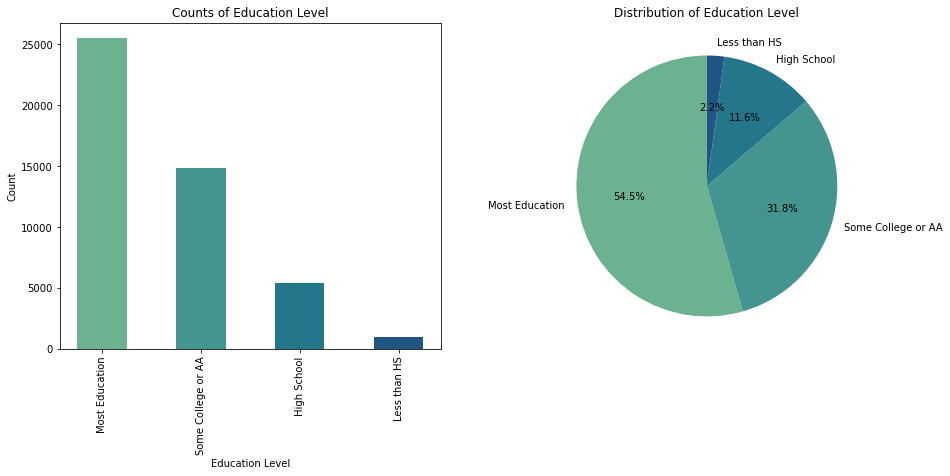

In [242]:
labels = ['Most Education', 'Some College or AA', 'High School', 'Less than HS']
data = [MOST_EDUC, SOME_COLL_AA, HIGHSC, LESS_HS]

palette = sns.color_palette("crest", len(labels))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(labels, data, width=0.5, color=palette)
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Education Level')
ax1.tick_params(axis='x', rotation=90)

ax2.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=palette)
ax2.set_title('Distribution of Education Level')

plt.show()


<div class="alert alert-block alert-success">
<b>Percentage of Vaccinated Individuals by Sex, Race, Income & Education
</div>

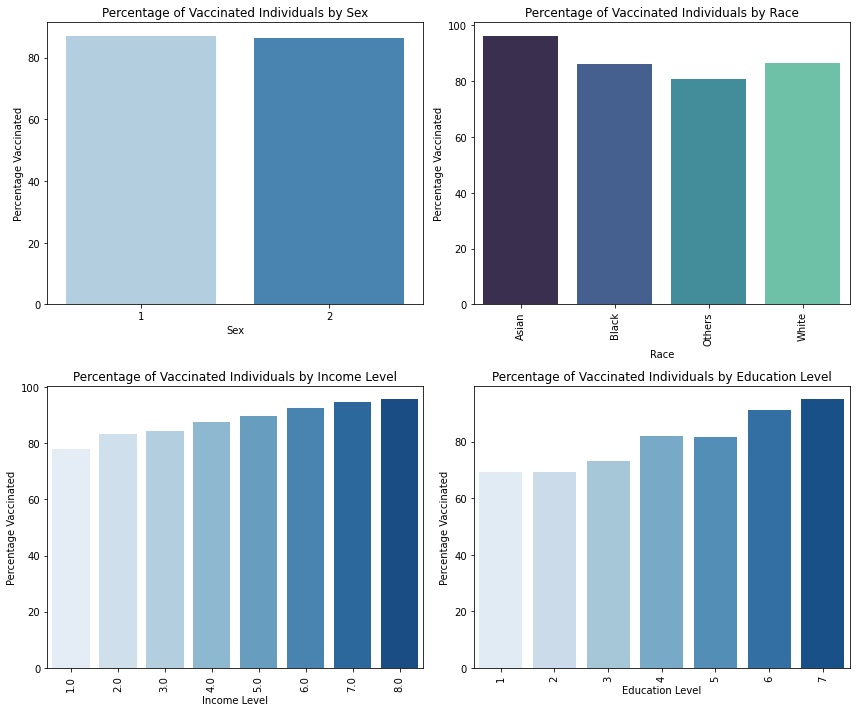

In [209]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# plot 1 - percentage vaccinated by sex
sns.barplot(x=percentage_vaccinated_by_sex.index, y=percentage_vaccinated_by_sex.values, palette='Blues', ax=axes[0,0])
axes[0,0].set_xlabel('Sex')
axes[0,0].set_ylabel('Percentage Vaccinated')
axes[0,0].set_title('Percentage of Vaccinated Individuals by Sex')

# plot 2 - percentage vaccinated by race
palette = sns.color_palette("mako", len(percentage_vaccinated_by_race))
sns.barplot(x=percentage_vaccinated_by_race.index, y=percentage_vaccinated_by_race.values, palette=palette, ax=axes[0,1])
axes[0,1].set_xlabel('Race')
axes[0,1].set_ylabel('Percentage Vaccinated')
axes[0,1].set_title('Percentage of Vaccinated Individuals by Race')
axes[0,1].tick_params(axis='x', labelrotation=90)

# plot 3 - percentage vaccinated by income level
sns.barplot(x=percentage_vaccinated_by_income.index, y=percentage_vaccinated_by_income.values, palette='Blues', ax=axes[1,0])
axes[1,0].set_xlabel('Income Level')
axes[1,0].set_ylabel('Percentage Vaccinated')
axes[1,0].set_title('Percentage of Vaccinated Individuals by Income Level')
axes[1,0].tick_params(axis='x', labelrotation=90)

# plot 4 - percentage vaccinated by education level
sns.barplot(x=percentage_vaccinated_by_education.index, y=percentage_vaccinated_by_education.values, palette='Blues', ax=axes[1,1])
axes[1,1].set_xlabel('Education Level')
axes[1,1].set_ylabel('Percentage Vaccinated')
axes[1,1].set_title('Percentage of Vaccinated Individuals by Education Level')
axes[1,1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Data 3 year comparison
</div>

In [109]:
data1= 'pulse2022_puf_48.csv'
data2= 'pulse2021_puf_34.csv'
data3= 'pulse2021_puf_22.csv'

In [110]:
df102 = dfweek48[['SCRAM', 'HWEIGHT', 'PWEIGHT', 'BIRTH_YEAR', 'INCOME','EST_ST','HISPANIC_ORG', 'RACE', 'EDUCATION','MARITAL_STATUS','SEX','GENDER','SEX_ORI','HOUSEHOLD_SIZE','NUM_KIDS_HOUSE','RECVDVACC','NUMDOSES','BOOSTERRV','HADCOVIDRV','TSPNDFOOD','TSPNDPRPD','FREEFOOD','ANXIOUS','WORRY','INTEREST','DOWN','SELFCARE','HLTHINS1','PRIVHLTH','PUBHLTH','TELEHLTH','TENURE','LIVQTRRV','ENERGY','ENRGY_BILL']]

In [111]:
dfweek34= pd.read_csv(data2, na_values=["-88","-99"],engine='python')
dfweek34.rename(columns = {'TBIRTH_YEAR':'BIRTH_YEAR', 'RHISPANIC':'HISPANIC_ORG', 'EEDUC':'EDUCATION','RRACE':'RACE', 'MS':'MARITAL_STATUS','EGENID_BIRTH':'SEX', 'GENID_DESCRIBE':'GENDER', 'SEXUAL_ORIENTATION':'SEX_ORI','THHLD_NUMPER':'HOUSEHOLD_SIZE', 'THHLD_NUMKID':'NUM_KIDS_HOUSE', 'LEARNFMT':'LEARN_FORMAT'}, inplace = True)
df103 = dfweek34[['SCRAM', 'HWEIGHT', 'PWEIGHT', 'BIRTH_YEAR', 'INCOME','EST_ST','HISPANIC_ORG', 'RACE', 'EDUCATION','MARITAL_STATUS','SEX','GENDER','SEX_ORI','HOUSEHOLD_SIZE','NUM_KIDS_HOUSE','RECVDVACC','FREEFOOD','ANXIOUS','WORRY','INTEREST','DOWN','HLTHINS1','PRIVHLTH','PUBHLTH','TELEHLTH','TENURE','LIVQTRRV','ENERGY','ENRGY_BILL']]
dfweek22= pd.read_csv(data3, na_values=["-88","-99"],engine='python')
dfweek22.rename(columns = {'TBIRTH_YEAR':'BIRTH_YEAR', 'RHISPANIC':'HISPANIC_ORG', 'EEDUC':'EDUCATION','RRACE':'RACE', 'MS':'MARITAL_STATUS','EGENID_BIRTH':'SEX', 'GENID_DESCRIBE':'GENDER', 'SEXUAL_ORIENTATION':'SEX_ORI','THHLD_NUMPER':'HOUSEHOLD_SIZE', 'THHLD_NUMKID':'NUM_KIDS_HOUSE', 'LEARNFMT':'LEARN_FORMAT'}, inplace = True)
df104 = dfweek22[['SCRAM', 'HWEIGHT', 'PWEIGHT', 'BIRTH_YEAR', 'INCOME','EST_ST','HISPANIC_ORG', 'RACE', 'EDUCATION','MARITAL_STATUS','EGENDER','HOUSEHOLD_SIZE','NUM_KIDS_HOUSE','RECVDVACC','TSPNDFOOD','TSPNDPRPD','FREEFOOD','ANXIOUS','WORRY','INTEREST','DOWN','HLTHINS1','PRIVHLTH','PUBHLTH','TENURE']]

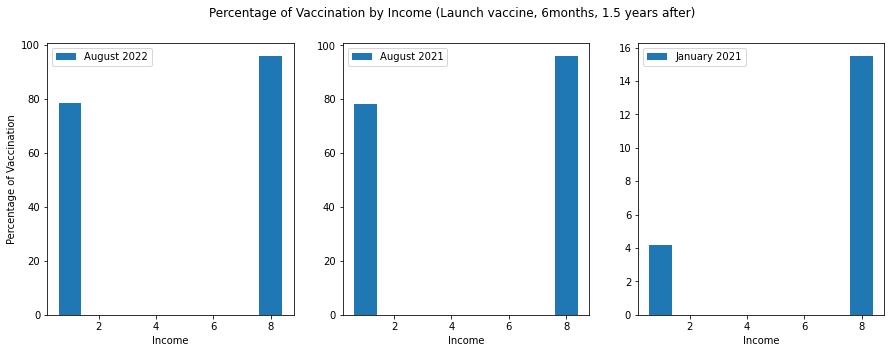

In [206]:
df102_filtered = df102[(df102['INCOME'].isin([1, 8])) & (df102['RECVDVACC'].isin([1, 2]))]
df103_filtered = df103[(df103['INCOME'].isin([1, 8])) & (df103['RECVDVACC'].isin([1, 2]))]
df104_filtered = df104[(df104['INCOME'].isin([1, 8])) & (df104['RECVDVACC'].isin([1, 2]))]

df102_grouped = df102_filtered.groupby(['INCOME', 'RECVDVACC']).size().unstack().fillna(0)
df103_grouped = df103_filtered.groupby(['INCOME', 'RECVDVACC']).size().unstack().fillna(0)
df104_grouped = df104_filtered.groupby(['INCOME', 'RECVDVACC']).size().unstack().fillna(0)

df102_grouped['Percentage'] = df102_grouped[1] / (df102_grouped[1] + df102_grouped[2]) * 100
df103_grouped['Percentage'] = df103_grouped[1] / (df103_grouped[1] + df103_grouped[2]) * 100
df104_grouped['Percentage'] = df104_grouped[1] / (df104_grouped[1] + df104_grouped[2]) * 100

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the graphs
axs[0].bar(df102_grouped.index, df102_grouped['Percentage'], label='August 2022')
axs[1].bar(df103_grouped.index, df103_grouped['Percentage'], label='August 2021')
axs[2].bar(df104_grouped.index, df104_grouped['Percentage'], label='January 2021')

# Set the axis labels and title
fig.suptitle('Percentage of Vaccination by Income (Launch vaccine, 6months, 1.5 years after)')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Percentage of Vaccination')
axs[1].set_xlabel('Income')
axs[2].set_xlabel('Income')

# Set the legend
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Show the plot
plt.show()


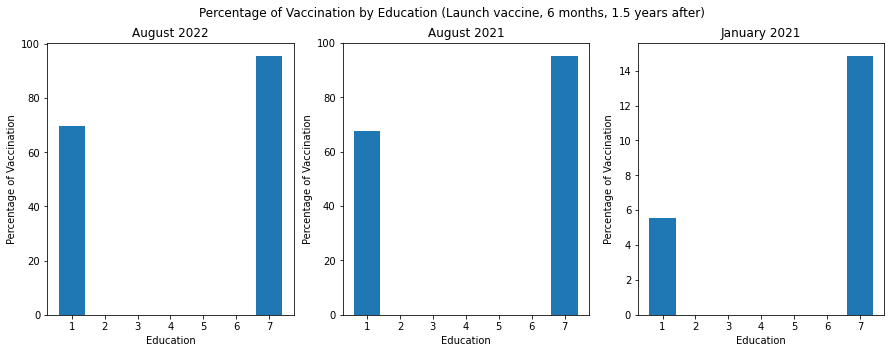

In [207]:
df102_filtered = df102[(df102['EDUCATION'].isin([1, 7])) & (df102['RECVDVACC'].isin([1, 2]))]
df103_filtered = df103[(df103['EDUCATION'].isin([1, 7])) & (df103['RECVDVACC'].isin([1, 2]))]
df104_filtered = df104[(df104['EDUCATION'].isin([1, 7])) & (df104['RECVDVACC'].isin([1, 2]))]

df102_grouped = df102_filtered.groupby(['EDUCATION', 'RECVDVACC']).size().unstack().fillna(0)
df103_grouped = df103_filtered.groupby(['EDUCATION', 'RECVDVACC']).size().unstack().fillna(0)
df104_grouped = df104_filtered.groupby(['EDUCATION', 'RECVDVACC']).size().unstack().fillna(0)

df102_grouped['Percentage'] = df102_grouped[1] / (df102_grouped[1] + df102_grouped[2]) * 100
df103_grouped['Percentage'] = df103_grouped[1] / (df103_grouped[1] + df103_grouped[2]) * 100
df104_grouped['Percentage'] = df104_grouped[1] / (df104_grouped[1] + df104_grouped[2]) * 100

fig, axs = plt.subplots(1, 3, figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.bar(df102_grouped.index, df102_grouped['Percentage'])
plt.title('August 2022')
plt.xlabel('Education')
plt.ylabel('Percentage of Vaccination')


plt.subplot(1, 3, 2)
plt.bar(df103_grouped.index, df103_grouped['Percentage'])
plt.title('August 2021')
plt.xlabel('Education')
plt.ylabel('Percentage of Vaccination')


plt.subplot(1, 3, 3)
plt.bar(df104_grouped.index, df104_grouped['Percentage'])
plt.title('January 2021')
plt.xlabel('Education')
plt.ylabel('Percentage of Vaccination')


plt.suptitle('Percentage of Vaccination by Education (Launch vaccine, 6 months, 1.5 years after)')
plt.show()


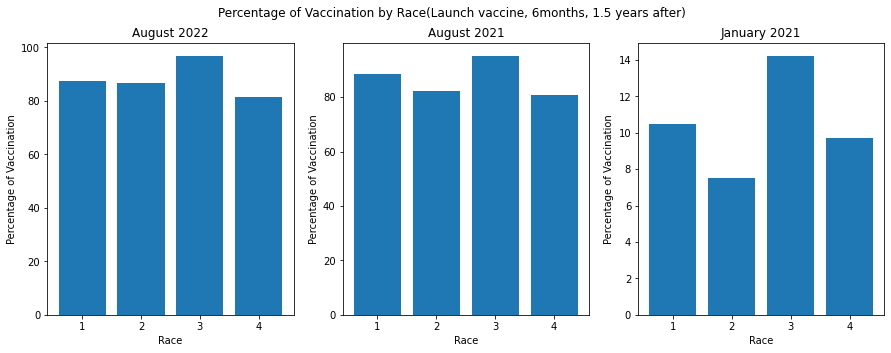

In [208]:
df102_filtered = df102[(df102['RACE'].isin([1, 2, 3, 4])) & (df102['RECVDVACC'].isin([1, 2]))]
df103_filtered = df103[(df103['RACE'].isin([1, 2, 3, 4])) & (df103['RECVDVACC'].isin([1, 2]))]
df104_filtered = df104[(df104['RACE'].isin([1, 2, 3, 4])) & (df104['RECVDVACC'].isin([1, 2]))]

df102_grouped = df102_filtered.groupby(['RACE', 'RECVDVACC']).size().unstack().fillna(0)
df103_grouped = df103_filtered.groupby(['RACE', 'RECVDVACC']).size().unstack().fillna(0)
df104_grouped = df104_filtered.groupby(['RACE', 'RECVDVACC']).size().unstack().fillna(0)

df102_grouped['Percentage'] = df102_grouped[1] / (df102_grouped[1] + df102_grouped[2]) * 100
df103_grouped['Percentage'] = df103_grouped[1] / (df103_grouped[1] + df103_grouped[2]) * 100
df104_grouped['Percentage'] = df104_grouped[1] / (df104_grouped[1] + df104_grouped[2]) * 100

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create three subplots

# Plot bar charts on each subplot
axes[0].bar(df102_grouped.index, df102_grouped['Percentage'], label='August 2022')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Percentage of Vaccination')
axes[0].set_title('August 2022')

axes[1].bar(df103_grouped.index, df103_grouped['Percentage'], label='August 2021')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Percentage of Vaccination')
axes[1].set_title('August 2021')

axes[2].bar(df104_grouped.index, df104_grouped['Percentage'], label='January 2021')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Percentage of Vaccination')
axes[2].set_title('January 2021')

plt.suptitle('Percentage of Vaccination by Race(Launch vaccine, 6months, 1.5 years after)')

plt.show()


<div class="alert alert-block alert-success">
<b>Sample Distribution filtered by political party that won the state in 2020
</div>

In [116]:
dfvac

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH
0,V480000001,1946,41,2.0,1,White,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1
1,V480000002,1958,31,NaN,1,White,5,1.0,1,1.0,2.0,4,1.0,1.0,2.0,2.0,3,3
2,V480000003,1971,17,1.0,2,White,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2
3,V480000004,1967,13,4.0,1,Black,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2
4,V480000005,1977,33,2.0,1,White,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,V480046797,1993,13,4.0,1,White,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2
46797,V480046798,1992,37,NaN,1,Others,6,2.0,2,2.0,2.0,5,1.0,2.0,2.0,1.0,3,3
46798,V480046799,1940,55,2.0,1,White,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1
46799,V480046800,1961,2,4.0,1,White,4,1.0,2,2.0,2.0,4,2.0,NaN,NaN,1.0,1,2


In [117]:
dfvac.corr()

,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH
BIRTH_YEAR,1.000000,0.019860,0.019249,0.104338,-0.038581,0.305475,0.021274,0.048428,0.137384,0.260722,0.123647,0.078881,0.205911,-0.186094,-0.017966,0.340656
EST_ST,0.019860,1.000000,-0.006917,-0.060626,-0.001946,-0.023769,-0.001688,-0.000122,0.011524,0.003609,0.009634,0.010543,0.014535,0.006770,-0.018381,0.008039
INCOME,0.019249,-0.006917,1.000000,-0.076106,0.441170,-0.344765,-0.146765,-0.152416,-0.078013,0.143564,-0.166450,0.095728,-0.152880,-0.072395,-0.367098,0.294287
HISPANIC_ORG,0.104338,-0.060626,-0.076106,1.000000,-0.111489,0.042350,0.010017,0.018833,0.041253,0.104447,0.012187,-0.055605,0.035163,-0.053330,0.056688,0.042208
EDUCATION,-0.038581,-0.001946,0.441170,-0.111489,1.000000,-0.114570,-0.042898,-0.052031,-0.046189,-0.078785,-0.224695,0.107979,-0.201741,-0.007366,-0.209077,0.019477
MARITAL_STATUS,0.305475,-0.023769,-0.344765,0.042350,-0.114570,1.000000,0.048427,0.078265,0.093352,-0.224557,0.034008,0.008674,0.072130,0.019876,0.095977,0.033955
SEX,0.021274,-0.001688,-0.146765,0.010017,-0.042898,0.048427,1.000000,0.858673,0.068083,0.019021,0.008225,-0.015241,0.004676,-0.032145,0.026220,-0.020776
GENDER,0.048428,-0.000122,-0.152416,0.018833,-0.052031,0.078265,0.858673,1.000000,0.178858,0.031296,0.007969,-0.016353,0.010466,-0.024172,0.036022,-0.009408
SEX_ORI,0.137384,0.011524,-0.078013,0.041253,-0.046189,0.093352,0.068083,0.178858,1.000000,0.048067,0.006183,0.004745,0.025398,0.003776,0.034093,0.032678
HOUSEHOLD_SIZE,0.260722,0.003609,0.143564,0.104447,-0.078785,-0.224557,0.019021,0.031296,0.048067,1.000000,0.126777,-0.009446,0.124094,-0.139600,0.041390,0.118705


In [118]:
dfvac.dropna()

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH
0,V480000001,1946,41,2.0,1,White,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1
2,V480000003,1971,17,1.0,2,White,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2
3,V480000004,1967,13,4.0,1,Black,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2
4,V480000005,1977,33,2.0,1,White,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1
5,V480000006,1994,8,4.0,1,White,6,5.0,2,2.0,1.0,1,1.0,2.0,2.0,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46794,V480046795,1991,10,3.0,1,White,4,5.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,2,2
46795,V480046796,1985,36,5.0,1,White,3,5.0,2,2.0,2.0,4,1.0,2.0,1.0,1.0,1,2
46796,V480046797,1993,13,4.0,1,White,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2
46798,V480046799,1940,55,2.0,1,White,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1


In [119]:
dfvac1 = dfweek48.loc[:, ['SCRAM', 'BIRTH_YEAR', 'EST_ST', 'INCOME', 'HISPANIC_ORG', 'RACE', 'EDUCATION',
                         'MARITAL_STATUS', 'SEX', 'GENDER', 'SEX_ORI', 'HOUSEHOLD_SIZE', 'RECVDVACC', 'NUMDOSES',
                         'BOOSTERRV', 'HADCOVIDRV', 'PRIVHLTH', 'PUBHLTH']]
dfvac1

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH
0,V480000001,1946,41,2.0,1,1,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1
1,V480000002,1958,31,NaN,1,1,5,1.0,1,1.0,2.0,4,1.0,1.0,2.0,2.0,3,3
2,V480000003,1971,17,1.0,2,1,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2
3,V480000004,1967,13,4.0,1,2,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2
4,V480000005,1977,33,2.0,1,1,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,V480046797,1993,13,4.0,1,1,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2
46797,V480046798,1992,37,NaN,1,4,6,2.0,2,2.0,2.0,5,1.0,2.0,2.0,1.0,3,3
46798,V480046799,1940,55,2.0,1,1,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1
46799,V480046800,1961,2,4.0,1,1,4,1.0,2,2.0,2.0,4,2.0,NaN,NaN,1.0,1,2


In [120]:
dfvac['RECVDVACC'].value_counts()

1.0    40575
2.0     5884
Name: RECVDVACC, dtype: int64

## Creating two variables for the political party that won the state in the 2020 election.

In [230]:
red_states = [1, 2, 5, 12, 16, 18, 19, 20, 21, 22, 28, 29, 30, 31, 37, 38, 39, 40, 45, 46, 47, 48, 49, 54, 56]

dfvac['red_states']= [1 if i in red_states else 0 for i in dfvac['EST_ST']]

dfvac['blue_states'] = [0 if i in red_states else 1 for i in dfvac['EST_ST']] 

In [231]:
dfvac.head()

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH,red_states,blue_states
0,V480000001,1946,41,2.0,1,NaN,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1,0,1
1,V480000002,1958,31,NaN,1,NaN,5,1.0,1,1.0,2.0,4,1.0,1.0,2.0,2.0,3,3,1,0
2,V480000003,1971,17,1.0,2,NaN,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2,0,1
3,V480000004,1967,13,4.0,1,NaN,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2,0,1
4,V480000005,1977,33,2.0,1,NaN,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1,0,1


In [232]:
dfvac['red_states'].sum()

20944

In [233]:
dfvacred_avg= dfvac['red_states'].sum()/ len(dfvac['red_states']) * 100

In [234]:
dfvacred_avg

44.75118053033055

In [235]:
dfvac['blue_states'].sum()

25857

In [236]:
dfvacblue_avg= dfvac['blue_states'].sum()/ len(dfvac['blue_states']) * 100
dfvacblue_avg

55.24881946966945

<div class="alert alert-block alert-success">
<b>Percentage of Vaccinated and political party that won the state in 2020
</div>

In [238]:
Xst= dfvac[['RECVDVACC','red_states']].drop(dfvac[dfvac['RECVDVACC']==-99].index)
Xst['RECVDVACC']= Xst['RECVDVACC'].map({1:1, 2:0})

In [132]:
Posi= dfvac[['HADCOVIDRV','red_states']].drop(dfvac[(dfvac['HADCOVIDRV']==-99 ) | (dfvac['HADCOVIDRV']==-88 )].index)
Posi['HADCOVIDRV']= Posi['HADCOVIDRV'].map({1:1, 2:0})

In [134]:
Posi['HADCOVIDRV'].describe()

count    46190.000000
mean         0.439034
std          0.496275
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HADCOVIDRV, dtype: float64

In [135]:
len(dfvac['HADCOVIDRV'])

46801

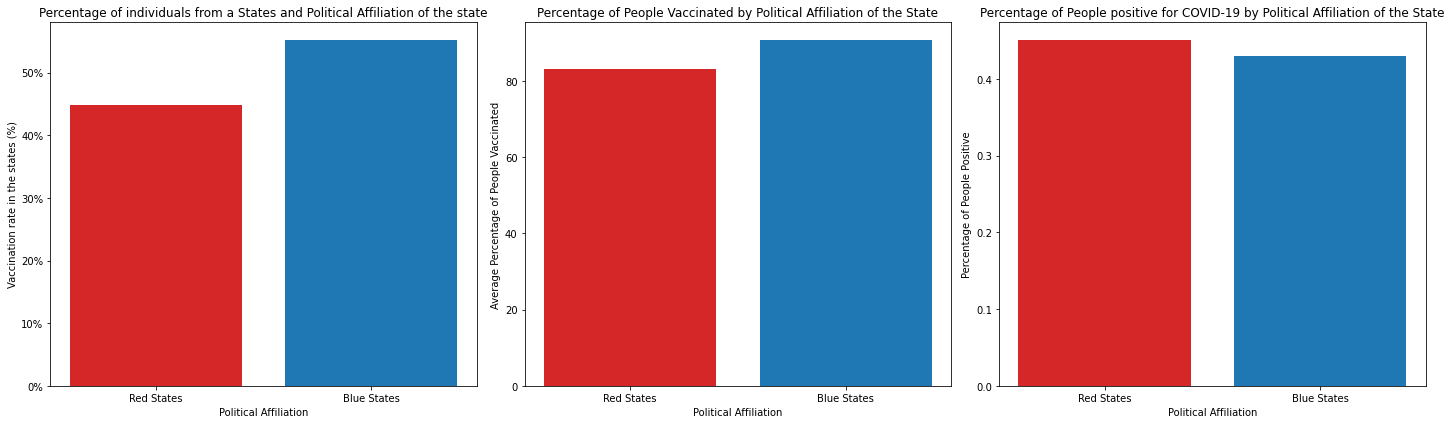

In [241]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))

# Plot 1
dfvacred_avg = dfvac['red_states'].sum() / len(dfvac['red_states']) * 100
dfvacblue_avg = dfvac['blue_states'].sum() / len(dfvac['blue_states']) * 100
counts = [dfvacred_avg, dfvacblue_avg]
labels = ['Red States', 'Blue States']
colors = ['tab:red', 'tab:blue']
axs[0].bar(labels, counts, color=colors)
axs[0].set_title('Percentage of individuals from a States and Political Affiliation of the state')
axs[0].set_xlabel('Political Affiliation')
axs[0].set_ylabel('Vaccination rate in the states (%)')
axs[0].yaxis.set_major_formatter('{:.0f}%'.format)

# Plot 2
Xst= dfvac[['RECVDVACC','red_states']].drop(dfvac[dfvac['RECVDVACC']==-99].index)
Xst['RECVDVACC']= Xst['RECVDVACC'].map({1:1, 2:0})
Xst = dfvac[['RECVDVACC','red_states']].drop(dfvac[dfvac['RECVDVACC']==-99].index)
Xst['RECVDVACC'] = Xst['RECVDVACC'].map({1:1, 2:0})
grouped = Xst.groupby('red_states')['RECVDVACC'].mean()[::-1] * 100
labels = ['Blue States', 'Red States'][::-1]
colors = ['tab:red', 'tab:blue']
axs[1].bar(labels, grouped, color=colors)
axs[1].set_title('Percentage of People Vaccinated by Political Affiliation of the State')
axs[1].set_xlabel('Political Affiliation')
axs[1].set_ylabel('Average Percentage of People Vaccinated')

# Plot 3
Posi= dfvac[['HADCOVIDRV','red_states']].drop(dfvac[(dfvac['HADCOVIDRV']==-99 ) | (dfvac['HADCOVIDRV']==-88 )].index)
Posi['HADCOVIDRV']= Posi['HADCOVIDRV'].map({1:1, 2:0})
grouped = Posi.groupby('red_states')['HADCOVIDRV'].mean()[::-1]
labels = ['Blue States', 'Red States'][::-1]
colors = ['tab:red', 'tab:blue']
axs[2].bar(labels, grouped, color=colors)
axs[2].set_title('Percentage of People positive for COVID-19 by Political Affiliation of the State')
axs[2].set_xlabel('Political Affiliation')
axs[2].set_ylabel('Percentage of People Positive')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


<div class="alert alert-block alert-success">
<b>Models
</div>

**OLS**

$$
y = \beta_1(BIRTHYEAR) + \beta_2(PUBHLTH) + \beta_3(RECVDVACC) + \beta_4(HOUSEHOLDSIZE)+ \beta_5(redstates)
$$

In [136]:
modelpos= smf.ols('HADCOVIDRV ~ BIRTH_YEAR + PUBHLTH + HOUSEHOLD_SIZE + red_states ', data= dfvac ).fit()
print(modelpos.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.045     
Dependent Variable: HADCOVIDRV       AIC:                64252.3401
Date:               2023-04-25 14:58 BIC:                64296.0427
No. Observations:   46190            Log-Likelihood:     -32121.   
Df Model:           4                F-statistic:        540.8     
Df Residuals:       46185            Prob (F-statistic): 0.00      
R-squared:          0.045            Scale:              0.23529   
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          10.8604   0.3004  36.1530 0.0000 10.2716 11.4492
BIRTH_YEAR         -0.0046   0.0002 -30.2060 0.0000 -0.0050 -0.0043
PUBHLTH            -0.0217   0.0034  -6.3367 0.0000 -0.0284 -0.0150
HOUSEHOLD_SIZE     -0.0318   0.0016 -20.4730 0.0000 -0.0349 -0.028

In [137]:
predicted_vals0 = modelpos.predict(dfvac)
dfvac = dfvac.reindex(predicted_vals0.index)
dfvac['ols_pr0'] = predicted_vals0
dfvac

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH,red_states,blue_states,ols_pr0
0,V480000001,1946,41,2.0,1,White,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1,0,1,1.761058
1,V480000002,1958,31,NaN,1,White,5,1.0,1,1.0,2.0,4,1.0,1.0,2.0,2.0,3,3,1,0,1.547481
2,V480000003,1971,17,1.0,2,White,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2,0,1,1.463928
3,V480000004,1967,13,4.0,1,Black,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2,0,1,1.482521
4,V480000005,1977,33,2.0,1,White,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1,0,1,1.489567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,V480046797,1993,13,4.0,1,White,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2,0,1,1.489053
46797,V480046798,1992,37,NaN,1,Others,6,2.0,2,2.0,2.0,5,1.0,2.0,2.0,1.0,3,3,1,0,1.357587
46798,V480046799,1940,55,2.0,1,White,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1,0,1,1.788949
46799,V480046800,1961,2,4.0,1,White,4,1.0,2,2.0,2.0,4,2.0,NaN,NaN,1.0,1,2,1,0,1.555218


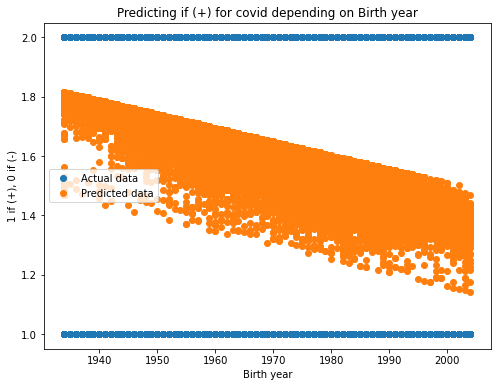

In [138]:
plt.figure(figsize=(8, 6))
plt.plot(dfvac['BIRTH_YEAR'], dfvac['HADCOVIDRV'], 'o', label='Actual data')
plt.plot(dfvac['BIRTH_YEAR'], dfvac['ols_pr0'], 'o', label='Predicted data')
plt.title('Predicting if (+) for covid depending on Birth year')
plt.xlabel('Birth year')
plt.ylabel('1 if (+), 0 if (-)')
plt.legend()
plt.show()


$$
y = \beta_1(BIRTHYEAR) + \beta_2(PUBHLTH) + \beta_3(RECVDVACC) + \beta_4(HOUSEHOLDSIZE)
$$

In [139]:
modelpos1= smf.ols('red_states ~ BIRTH_YEAR + PUBHLTH + RECVDVACC + HOUSEHOLD_SIZE', data= dfvac).fit()
print(modelpos1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.014     
Dependent Variable: red_states       AIC:                66296.3751
Date:               2023-04-25 14:58 BIC:                66340.1067
No. Observations:   46459            Log-Likelihood:     -33143.   
Df Model:           4                F-statistic:        160.3     
Df Residuals:       46454            Prob (F-statistic): 1.52e-136 
R-squared:          0.014            Scale:              0.24390   
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept        1.1821    0.3059   3.8639  0.0001   0.5825   1.7817
BIRTH_YEAR      -0.0005    0.0002  -3.0339  0.0024  -0.0008  -0.0002
PUBHLTH         -0.0023    0.0035  -0.6783  0.4976  -0.0091   0.0044
RECVDVACC        0.1714    0.0070  24.5617  0.0000   0.1577 

$$
y = \beta_1(BIRTHYEAR) + \beta_2(PUBHLTH) + \beta_3(RECVDVACC) + \beta_4(BOOSTERRV) + \beta_4(HOUSEHOLDSIZE)
$$

In [140]:
modelpos11= smf.ols('red_states ~ BIRTH_YEAR + PUBHLTH + RECVDVACC + BOOSTERRV + HOUSEHOLD_SIZE', data= dfvac).fit()
print(modelpos11.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.018     
Dependent Variable: red_states       AIC:                57161.9930
Date:               2023-04-25 14:58 BIC:                57205.0380
No. Observations:   40498            Log-Likelihood:     -28576.   
Df Model:           4                F-statistic:        184.4     
Df Residuals:       40493            Prob (F-statistic): 6.58e-157 
R-squared:          0.018            Scale:              0.24014   
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept        1.5034    0.1641   9.1617  0.0000   1.1818   1.8251
BIRTH_YEAR      -0.0014    0.0002  -8.3579  0.0000  -0.0017  -0.0011
PUBHLTH         -0.0043    0.0037  -1.1440  0.2526  -0.0116   0.0031
RECVDVACC        1.5034    0.1641   9.1617  0.0000   1.1818 

In [141]:
predicted_vals = modelpos11.predict(dfvac)
dfvac = dfvac.reindex(predicted_vals.index)
dfvac['ols_pr'] = predicted_vals
dfvac

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH,red_states,blue_states,ols_pr0,ols_pr
0,V480000001,1946,41,2.0,1,White,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1,0,1,1.761058,0.421474
1,V480000002,1958,31,NaN,1,White,5,1.0,1,1.0,2.0,4,1.0,1.0,2.0,2.0,3,3,1,0,1.547481,0.569111
2,V480000003,1971,17,1.0,2,White,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2,0,1,1.463928,0.404560
3,V480000004,1967,13,4.0,1,Black,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2,0,1,1.482521,0.410202
4,V480000005,1977,33,2.0,1,White,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1,0,1,1.489567,0.395851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,V480046797,1993,13,4.0,1,White,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2,0,1,1.489053,0.355417
46797,V480046798,1992,37,NaN,1,Others,6,2.0,2,2.0,2.0,5,1.0,2.0,2.0,1.0,3,3,1,0,1.357587,0.525675
46798,V480046799,1940,55,2.0,1,White,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1,0,1,1.788949,0.589487
46799,V480046800,1961,2,4.0,1,White,4,1.0,2,2.0,2.0,4,2.0,NaN,NaN,1.0,1,2,1,0,1.555218,NaN


## Decision Tree Regression

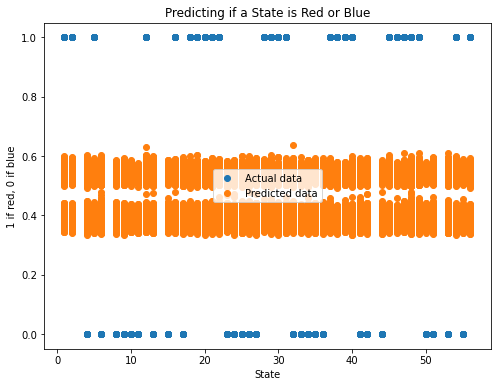

In [142]:
plt.figure(figsize=(8, 6))
plt.plot(dfvac['EST_ST'], dfvac['red_states'], 'o', label='Actual data')
plt.plot(dfvac['EST_ST'], dfvac['ols_pr'], 'o', label='Predicted data')
plt.title('Predicting if a State is Red or Blue')
plt.xlabel('State')
plt.ylabel('1 if red, 0 if blue')
plt.legend()
plt.show()

In [143]:
dfvac1 = dfvac.copy()

In [144]:
dfvac['RECVDVACC'].value_counts()

1.0    40575
2.0     5884
Name: RECVDVACC, dtype: int64

In [145]:
dfvac.dropna(inplace=True)

In [146]:
dfvac.dropna()

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH,red_states,blue_states,ols_pr0,ols_pr
0,V480000001,1946,41,2.0,1,White,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1,0,1,1.761058,0.421474
2,V480000003,1971,17,1.0,2,White,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2,0,1,1.463928,0.404560
3,V480000004,1967,13,4.0,1,Black,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2,0,1,1.482521,0.410202
4,V480000005,1977,33,2.0,1,White,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1,0,1,1.489567,0.395851
5,V480000006,1994,8,4.0,1,White,6,5.0,2,2.0,1.0,1,1.0,2.0,2.0,1.0,1,2,0,1,1.516252,0.509028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46794,V480046795,1991,10,3.0,1,White,4,5.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,2,2,0,1,1.530198,0.513260
46795,V480046796,1985,36,5.0,1,White,3,5.0,2,2.0,2.0,4,1.0,2.0,1.0,1.0,1,2,0,1,1.462545,0.375756
46796,V480046797,1993,13,4.0,1,White,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2,0,1,1.489053,0.355417
46798,V480046799,1940,55,2.0,1,White,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1,0,1,1.788949,0.589487


In [147]:
dfvac['RECVDVACC'].value_counts()

1.0    32352
Name: RECVDVACC, dtype: int64

In [148]:
correlation_matrix = dfvac.corr()
correlation_matrix.dropna()

,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH,red_states,blue_states,ols_pr0,ols_pr


In [149]:
dfvac['INCOME'].dropna()

0        2.0
2        1.0
3        4.0
4        2.0
5        4.0
        ... 
46794    3.0
46795    5.0
46796    4.0
46798    2.0
46800    8.0
Name: INCOME, Length: 32352, dtype: float64

In [150]:
dfvac['RECVDVACC'].isnull().sum()

0

In [151]:
ST= [['BOOSTERRV','INCOME','RECVDVACC']]
RD= [['red_states']]

In [152]:
dfvac['BOOSTERRV'].value_counts()

1.0    25689
2.0     6663
Name: BOOSTERRV, dtype: int64

In [153]:
dfvac['INCOME'].value_counts().sum()

32352

In [154]:
dfvac['RECVDVACC'].value_counts().sum()

32352

In [155]:
dfvac['red_states'].value_counts().sum()

32352

In [156]:
dfvac['INCOME'].isnull().sum()

0

In [157]:
dfvac['red_states'].value_counts().sum()

32352

In [158]:
ST = dfvac[['BOOSTERRV']].values.reshape(-1, 1)  
RD = dfvac['red_states'].values.reshape(-1, 1)  


dtr = tree.DecisionTreeRegressor().fit(ST, RD)


In [159]:
ST = dfvac['BOOSTERRV'].values.reshape(-1, 1)
RD = dfvac['red_states'].values.reshape(-1, 1)

dfvac['dtr_pred'] = dtr.predict(RD)


In [160]:
ST = dfvac[['BOOSTERRV', 'INCOME', 'RECVDVACC', 'SEX_ORI','HADCOVIDRV', 'SEX','PRIVHLTH','PUBHLTH','HISPANIC_ORG','BIRTH_YEAR','MARITAL_STATUS','NUMDOSES','GENDER','EDUCATION']].values
RD = dfvac['red_states'].values.reshape(-1, 1)

dtr420 = tree.DecisionTreeRegressor().fit(ST, RD)
dfvac['dtr_pred2'] = dtr420.predict(ST)
dfvac

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH,red_states,blue_states,ols_pr0,ols_pr,dtr_pred,dtr_pred2
0,V480000001,1946,41,2.0,1,White,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1,0,1,1.761058,0.421474,0.392036,0.0
2,V480000003,1971,17,1.0,2,White,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2,0,1,1.463928,0.404560,0.392036,0.0
3,V480000004,1967,13,4.0,1,Black,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2,0,1,1.482521,0.410202,0.392036,0.0
4,V480000005,1977,33,2.0,1,White,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1,0,1,1.489567,0.395851,0.392036,0.0
5,V480000006,1994,8,4.0,1,White,6,5.0,2,2.0,1.0,1,1.0,2.0,2.0,1.0,1,2,0,1,1.516252,0.509028,0.392036,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46794,V480046795,1991,10,3.0,1,White,4,5.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,2,2,0,1,1.530198,0.513260,0.392036,0.0
46795,V480046796,1985,36,5.0,1,White,3,5.0,2,2.0,2.0,4,1.0,2.0,1.0,1.0,1,2,0,1,1.462545,0.375756,0.392036,0.0
46796,V480046797,1993,13,4.0,1,White,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2,0,1,1.489053,0.355417,0.392036,0.0
46798,V480046799,1940,55,2.0,1,White,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1,0,1,1.788949,0.589487,0.392036,0.0


In [161]:
print(ST.shape)
print(RD.shape)

(32352, 14)
(32352, 1)


In [162]:
dfvac['RECVDVACC'].value_counts()

1.0    32352
Name: RECVDVACC, dtype: int64

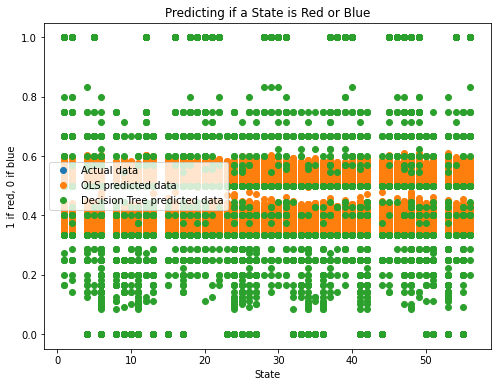

In [163]:
plt.figure(figsize=(8, 6))
plt.plot(dfvac['EST_ST'], dfvac['red_states'], 'o', label='Actual data')
plt.plot(dfvac['EST_ST'], dfvac['ols_pr'], 'o', label='OLS predicted data')
plt.plot(dfvac['EST_ST'], dfvac['dtr_pred2'], 'o', label='Decision Tree predicted data')
plt.legend()
plt.title('Predicting if a State is Red or Blue')
plt.xlabel('State')
plt.ylabel('1 if red, 0 if blue')
plt.show()


In [164]:
ols_mse= ((dfvac['red_states'] - dfvac['ols_pr'])**2).sum() /len(dfvac)
dtr_mse= ((dfvac['red_states'] - dfvac['dtr_pred2'])**2).sum() /len(dfvac)

In [165]:
ols_mse, dtr_mse

(0.23987592427592894, 0.0417699508598062)

In [166]:
dfvac[['red_states','dtr_pred2']].describe() # By using describe() we are able to compare strength of our prediction by using the summary statistics of the variable red_states and dtr_pr1

,red_states,dtr_pred2
count,32352.000000,32352.000000
mean,0.423714,0.423714
std,0.494154,0.449908
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.250000
75%,1.000000,1.000000
max,1.000000,1.000000


$$
y(DTR2) = \beta_1(BIRTHYEAR) + \beta_2(PUBHLTH) + \beta_3(RECVDVACC) + \beta_4(BOOSTERRV) + \beta_4(HOUSEHOLDSIZE)
$$

In [167]:
olspred11= smf.ols('dtr_pred2 ~ BIRTH_YEAR + PUBHLTH + RECVDVACC + BOOSTERRV + HOUSEHOLD_SIZE', data= dfvac).fit()
print(olspred11.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.021     
Dependent Variable: dtr_pred2        AIC:                39445.7061
Date:               2023-04-25 14:58 BIC:                39487.6283
No. Observations:   32352            Log-Likelihood:     -19718.   
Df Model:           4                F-statistic:        175.4     
Df Residuals:       32347            Prob (F-statistic): 6.08e-149 
R-squared:          0.021            Scale:              0.19814   
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept        1.3170    0.1751   7.5209  0.0000   0.9738   1.6602
BIRTH_YEAR      -0.0012    0.0002  -6.7614  0.0000  -0.0016  -0.0009
PUBHLTH         -0.0071    0.0047  -1.5186  0.1289  -0.0163   0.0021
RECVDVACC        1.3170    0.1751   7.5209  0.0000   0.9738 

## Prediction of values, slight intended error in the DTR model.

In [168]:
dtr11= tree.DecisionTreeRegressor(max_depth= 10).fit(ST, RD)
dfvac['dtr_pr11']= dtr11.predict(ST)
dfvac.head()

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH,red_states,blue_states,ols_pr0,ols_pr,dtr_pred,dtr_pred2,dtr_pr11
0,V480000001,1946,41,2.0,1,White,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1,0,1,1.761058,0.421474,0.392036,0.0,0.459272
2,V480000003,1971,17,1.0,2,White,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2,0,1,1.463928,0.404560,0.392036,0.0,0.222222
3,V480000004,1967,13,4.0,1,Black,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2,0,1,1.482521,0.410202,0.392036,0.0,0.509702
4,V480000005,1977,33,2.0,1,White,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1,0,1,1.489567,0.395851,0.392036,0.0,0.238095
5,V480000006,1994,8,4.0,1,White,6,5.0,2,2.0,1.0,1,1.0,2.0,2.0,1.0,1,2,0,1,1.516252,0.509028,0.392036,0.0,0.511628


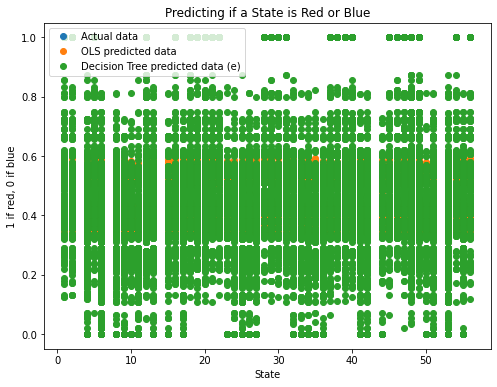

In [169]:
plt.figure(figsize=(8, 6))
plt.plot(dfvac['EST_ST'], dfvac['red_states'], 'o', label='Actual data')
plt.plot(dfvac['EST_ST'], dfvac['ols_pr'], 'o', label='OLS predicted data')
plt.plot(dfvac['EST_ST'], dfvac['dtr_pr11'], 'o', label='Decision Tree predicted data (e)')
plt.legend()
plt.title('Predicting if a State is Red or Blue')
plt.xlabel('State')
plt.ylabel('1 if red, 0 if blue')
plt.show()


In [170]:
dfvac[['red_states','dtr_pr11']].describe() 

,red_states,dtr_pr11
count,32352.000000,32352.000000
mean,0.423714,0.423714
std,0.494154,0.156145
min,0.000000,0.000000
25%,0.000000,0.332308
50%,0.000000,0.424638
75%,1.000000,0.510638
max,1.000000,1.000000


In [171]:
dtr_mse11= ((dfvac['red_states'] - dfvac['dtr_pr11'])**2).sum() /len(dfvac)

$$
y(DTR2) = \beta_1(BIRTHYEAR) + \beta_2(PUBHLTH) + \beta_3(RECVDVACC) + \beta_4(BOOSTERRV) + \beta_4(HOUSEHOLDSIZE)
$$

In [172]:
olspred11= smf.ols('dtr_pr11 ~ BIRTH_YEAR + PUBHLTH + RECVDVACC + BOOSTERRV + HOUSEHOLD_SIZE', data= dfvac).fit()
print(olspred11.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.177      
Dependent Variable: dtr_pr11         AIC:                -34638.7338
Date:               2023-04-25 14:58 BIC:                -34596.8117
No. Observations:   32352            Log-Likelihood:     17324.     
Df Model:           4                F-statistic:        1740.      
Df Residuals:       32347            Prob (F-statistic): 0.00       
R-squared:          0.177            Scale:              0.020066   
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept        1.3664    0.0557   24.5206  0.0000   1.2572   1.4757
BIRTH_YEAR      -0.0013    0.0001  -22.1065  0.0000  -0.0014  -0.0012
PUBHLTH         -0.0065    0.0015   -4.3472  0.0000  -0.0094  -0.0036
RECVDVACC        1.3664    0.0557   24.5206  0.

In [173]:
{'OLS':ols_mse, 'DTR1':dtr_mse, 'DTR2':dtr_mse11}

{'OLS': 0.23987592427592894,
 'DTR1': 0.0417699508598062,
 'DTR2': 0.21980009710074774}

<div class="alert alert-block alert-success">
<b>Financial Difficulties due to covid/ Second sub-sample
</div>

In [174]:
df102 = dfweek48[['SCRAM', 'HWEIGHT', 'PWEIGHT', 'BIRTH_YEAR','EST_ST', 'HISPANIC_ORG', 'RACE', 'EDUCATION','MARITAL_STATUS','SEX','GENDER','SEX_ORI','HOUSEHOLD_SIZE','NUM_KIDS_HOUSE','HADCOVIDRV','WRKLOSSRV','ANYWORK','WKVOL','CTC_CLAIM','EXPNS_DIF','TSPNDFOOD','TSPNDPRPD','UI_APPLYRV','UI_RECVRV','SNAP_YN','RECVDVACC','INCOME']]

In [175]:
df102

,SCRAM,HWEIGHT,PWEIGHT,BIRTH_YEAR,EST_ST,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,NUM_KIDS_HOUSE,HADCOVIDRV,WRKLOSSRV,ANYWORK,WKVOL,CTC_CLAIM,EXPNS_DIF,TSPNDFOOD,TSPNDPRPD,UI_APPLYRV,UI_RECVRV,SNAP_YN,RECVDVACC,INCOME
0,V480000001,1411.203878,1261.919425,1946,41,1,1,5,3.0,2,2.0,2.0,1,0,2.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0
1,V480000002,1021.299839,3735.204079,1958,31,1,1,5,1.0,1,1.0,2.0,4,0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,1.0,NaN
2,V480000003,13111.143310,49438.385982,1971,17,2,1,3,4.0,2,2.0,4.0,6,2,2.0,1.0,2.0,2.0,2.0,4.0,550.0,75.0,2.0,2.0,2.0,1.0,1.0
3,V480000004,2123.268644,10637.705782,1967,13,1,2,7,2.0,2,2.0,2.0,6,1,1.0,2.0,1.0,1.0,2.0,1.0,300.0,260.0,2.0,2.0,2.0,1.0,4.0
4,V480000005,343.061621,1357.461102,1977,33,1,1,6,3.0,2,2.0,2.0,5,1,2.0,2.0,1.0,1.0,1.0,3.0,850.0,50.0,2.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,V480046797,1982.875210,3973.730437,1993,13,1,1,6,1.0,2,2.0,2.0,2,0,1.0,2.0,1.0,2.0,2.0,4.0,500.0,50.0,2.0,2.0,2.0,1.0,4.0
46797,V480046798,4244.617883,3938.132319,1992,37,1,4,6,2.0,2,2.0,2.0,5,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
46798,V480046799,6199.383705,5955.473764,1940,55,1,1,3,2.0,2,2.0,2.0,1,0,2.0,2.0,2.0,2.0,2.0,4.0,138.0,11.0,2.0,2.0,2.0,1.0,2.0
46799,V480046800,167.238290,327.723025,1961,2,1,1,4,1.0,2,2.0,2.0,4,2,1.0,2.0,1.0,1.0,2.0,3.0,700.0,0.0,2.0,2.0,2.0,2.0,4.0


In [176]:
df102.rename(columns = {'CTC_CLAIM':'CHILD_TAX','UI_APPLYRV':'APPLY_UNEMBEN','UI_RECVRV':'RECIVED_UNB', 'SNAP_YN': 'FOOD_STAMPS'}, inplace = True)


/var/folders/m9/61th4b515lg334wxvxd534ch0000gn/T/ipykernel_6493/1299007365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df102.rename(columns = {'CTC_CLAIM':'CHILD_TAX','UI_APPLYRV':'APPLY_UNEMBEN','UI_RECVRV':'RECIVED_UNB', 'SNAP_YN': 'FOOD_STAMPS'}, inplace = True)


In [177]:
df102.dropna()

,SCRAM,HWEIGHT,PWEIGHT,BIRTH_YEAR,EST_ST,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,NUM_KIDS_HOUSE,HADCOVIDRV,WRKLOSSRV,ANYWORK,WKVOL,CHILD_TAX,EXPNS_DIF,TSPNDFOOD,TSPNDPRPD,APPLY_UNEMBEN,RECIVED_UNB,FOOD_STAMPS,RECVDVACC,INCOME
0,V480000001,1411.203878,1261.919425,1946,41,1,1,5,3.0,2,2.0,2.0,1,0,2.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0
2,V480000003,13111.143310,49438.385982,1971,17,2,1,3,4.0,2,2.0,4.0,6,2,2.0,1.0,2.0,2.0,2.0,4.0,550.0,75.0,2.0,2.0,2.0,1.0,1.0
3,V480000004,2123.268644,10637.705782,1967,13,1,2,7,2.0,2,2.0,2.0,6,1,1.0,2.0,1.0,1.0,2.0,1.0,300.0,260.0,2.0,2.0,2.0,1.0,4.0
4,V480000005,343.061621,1357.461102,1977,33,1,1,6,3.0,2,2.0,2.0,5,1,2.0,2.0,1.0,1.0,1.0,3.0,850.0,50.0,2.0,2.0,2.0,1.0,2.0
5,V480000006,2052.005316,2061.157614,1994,8,1,1,6,5.0,2,2.0,1.0,1,0,1.0,2.0,1.0,1.0,2.0,2.0,100.0,0.0,2.0,2.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46795,V480046796,16721.042461,29458.655403,1985,36,1,1,3,5.0,2,2.0,2.0,4,2,1.0,2.0,1.0,2.0,1.0,4.0,225.0,75.0,2.0,2.0,2.0,1.0,5.0
46796,V480046797,1982.875210,3973.730437,1993,13,1,1,6,1.0,2,2.0,2.0,2,0,1.0,2.0,1.0,2.0,2.0,4.0,500.0,50.0,2.0,2.0,2.0,1.0,4.0
46798,V480046799,6199.383705,5955.473764,1940,55,1,1,3,2.0,2,2.0,2.0,1,0,2.0,2.0,2.0,2.0,2.0,4.0,138.0,11.0,2.0,2.0,2.0,1.0,2.0
46799,V480046800,167.238290,327.723025,1961,2,1,1,4,1.0,2,2.0,2.0,4,2,1.0,2.0,1.0,1.0,2.0,3.0,700.0,0.0,2.0,2.0,2.0,2.0,4.0


<div class="alert alert-block alert-success">
<b>Income
</div>

In [178]:
df102['INCOME'].value_counts()

6.0    6870
4.0    6296
5.0    5353
8.0    4188
1.0    4072
3.0    3923
7.0    3510
2.0    3193
Name: INCOME, dtype: int64

In [179]:
i1= (df102['INCOME']== 1).sum()
i2= (df102['INCOME']== 2).sum()
i3= (df102['INCOME']== 3).sum()
i4= (df102['INCOME']== 4).sum()
i5= (df102['INCOME']== 5).sum()
i6= (df102['INCOME']== 6).sum()
i7= (df102['INCOME']== 7).sum()
     

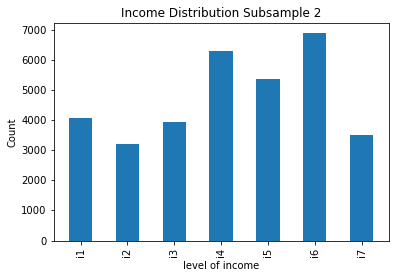

In [180]:
plt.bar(['i1', 'i2', 'i3', 'i4', 'i5','i6','i7'], [i1, i2, i3, i4, i5,i6,i7], width=0.5)

plt.xlabel('level of income')
plt.ylabel('Count')
plt.title('Income Distribution Subsample 2')


plt.xticks(rotation=90)


plt.show()

In [181]:
model1 = smf.ols('EXPNS_DIF~ HISPANIC_ORG + RACE + SEX + HADCOVIDRV + FOOD_STAMPS + INCOME ', data= df102).fit()
print(model1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.231      
Dependent Variable: EXPNS_DIF        AIC:                100527.2401
Date:               2023-04-25 14:58 BIC:                100586.8780
No. Observations:   37038            Log-Likelihood:     -50257.    
Df Model:           6                F-statistic:        1853.      
Df Residuals:       37031            Prob (F-statistic): 0.00       
R-squared:          0.231            Scale:              0.88347    
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept        3.7228    0.0500   74.4455  0.0000   3.6248   3.8208
HISPANIC_ORG     0.1762    0.0182    9.6944  0.0000   0.1406   0.2118
RACE             0.0627    0.0063   10.0102  0.0000   0.0504   0.0750
SEX              0.0470    0.0100    4.6840  0.

<div class="alert alert-block alert-success">
<b>DataSet 2 (Filtered DataSet)
</div>

In [182]:
dfvac9= dfweek48[['SCRAM','BIRTH_YEAR','EST_ST','INCOME', 'HISPANIC_ORG','RACE','EDUCATION','MARITAL_STATUS','SEX','GENDER','SEX_ORI','HOUSEHOLD_SIZE','RECVDVACC','NUMDOSES','BOOSTERRV','HADCOVIDRV','PRIVHLTH','PUBHLTH']]

In [183]:
dfvac9

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH
0,V480000001,1946,41,2.0,1,1,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1
1,V480000002,1958,31,NaN,1,1,5,1.0,1,1.0,2.0,4,1.0,1.0,2.0,2.0,3,3
2,V480000003,1971,17,1.0,2,1,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2
3,V480000004,1967,13,4.0,1,2,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2
4,V480000005,1977,33,2.0,1,1,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,V480046797,1993,13,4.0,1,1,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2
46797,V480046798,1992,37,NaN,1,4,6,2.0,2,2.0,2.0,5,1.0,2.0,2.0,1.0,3,3
46798,V480046799,1940,55,2.0,1,1,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1
46799,V480046800,1961,2,4.0,1,1,4,1.0,2,2.0,2.0,4,2.0,NaN,NaN,1.0,1,2


In [184]:
dfvac9.dropna()

,SCRAM,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH
0,V480000001,1946,41,2.0,1,1,5,3.0,2,2.0,2.0,1,1.0,2.0,1.0,2.0,2,1
2,V480000003,1971,17,1.0,2,1,3,4.0,2,2.0,4.0,6,1.0,1.0,1.0,2.0,2,2
3,V480000004,1967,13,4.0,1,2,7,2.0,2,2.0,2.0,6,1.0,2.0,1.0,1.0,1,2
4,V480000005,1977,33,2.0,1,1,6,3.0,2,2.0,2.0,5,1.0,1.0,1.0,2.0,3,1
5,V480000006,1994,8,4.0,1,1,6,5.0,2,2.0,1.0,1,1.0,2.0,2.0,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46794,V480046795,1991,10,3.0,1,1,4,5.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,2,2
46795,V480046796,1985,36,5.0,1,1,3,5.0,2,2.0,2.0,4,1.0,2.0,1.0,1.0,1,2
46796,V480046797,1993,13,4.0,1,1,6,1.0,2,2.0,2.0,2,1.0,2.0,1.0,1.0,1,2
46798,V480046799,1940,55,2.0,1,1,3,2.0,2,2.0,2.0,1,1.0,2.0,2.0,2.0,1,1


In [185]:
dfvac9.isnull().sum()

SCRAM                0
BIRTH_YEAR           0
EST_ST               0
INCOME            9396
HISPANIC_ORG         0
RACE                 0
EDUCATION            0
MARITAL_STATUS     320
SEX                  0
GENDER             429
SEX_ORI            662
HOUSEHOLD_SIZE       0
RECVDVACC          342
NUMDOSES          6604
BOOSTERRV         6303
HADCOVIDRV         611
PRIVHLTH             0
PUBHLTH              0
dtype: int64

In [186]:
dfvac9.corr()

,BIRTH_YEAR,EST_ST,INCOME,HISPANIC_ORG,RACE,EDUCATION,MARITAL_STATUS,SEX,GENDER,SEX_ORI,HOUSEHOLD_SIZE,RECVDVACC,NUMDOSES,BOOSTERRV,HADCOVIDRV,PRIVHLTH,PUBHLTH
BIRTH_YEAR,1.000000,0.019860,0.019249,0.104338,0.099076,-0.038581,0.305475,0.021274,0.048428,0.137384,0.260722,0.123647,0.078881,0.205911,-0.186094,-0.017966,0.340656
EST_ST,0.019860,1.000000,-0.006917,-0.060626,-0.045931,-0.001946,-0.023769,-0.001688,-0.000122,0.011524,0.003609,0.009634,0.010543,0.014535,0.006770,-0.018381,0.008039
INCOME,0.019249,-0.006917,1.000000,-0.076106,-0.059069,0.441170,-0.344765,-0.146765,-0.152416,-0.078013,0.143564,-0.166450,0.095728,-0.152880,-0.072395,-0.367098,0.294287
HISPANIC_ORG,0.104338,-0.060626,-0.076106,1.000000,0.050076,-0.111489,0.042350,0.010017,0.018833,0.041253,0.104447,0.012187,-0.055605,0.035163,-0.053330,0.056688,0.042208
RACE,0.099076,-0.045931,-0.059069,0.050076,1.000000,-0.026285,0.073549,0.006491,0.031115,0.054734,0.087512,0.004328,-0.059735,0.009242,0.005731,0.040729,0.027634
EDUCATION,-0.038581,-0.001946,0.441170,-0.111489,-0.026285,1.000000,-0.114570,-0.042898,-0.052031,-0.046189,-0.078785,-0.224695,0.107979,-0.201741,-0.007366,-0.209077,0.019477
MARITAL_STATUS,0.305475,-0.023769,-0.344765,0.042350,0.073549,-0.114570,1.000000,0.048427,0.078265,0.093352,-0.224557,0.034008,0.008674,0.072130,0.019876,0.095977,0.033955
SEX,0.021274,-0.001688,-0.146765,0.010017,0.006491,-0.042898,0.048427,1.000000,0.858673,0.068083,0.019021,0.008225,-0.015241,0.004676,-0.032145,0.026220,-0.020776
GENDER,0.048428,-0.000122,-0.152416,0.018833,0.031115,-0.052031,0.078265,0.858673,1.000000,0.178858,0.031296,0.007969,-0.016353,0.010466,-0.024172,0.036022,-0.009408
SEX_ORI,0.137384,0.011524,-0.078013,0.041253,0.054734,-0.046189,0.093352,0.068083,0.178858,1.000000,0.048067,0.006183,0.004745,0.025398,0.003776,0.034093,0.032678


In [187]:
var_names0= ['EDUCATION','MARITAL_STATUS','SEX','GENDER','HOUSEHOLD_SIZE','RECVDVACC','BOOSTERRV','PRIVHLTH','PUBHLTH']

In [188]:
Xmissing= dfvac9[dfvac9['INCOME'].isnull()][var_names0]
Xmissing

,EDUCATION,MARITAL_STATUS,SEX,GENDER,HOUSEHOLD_SIZE,RECVDVACC,BOOSTERRV,PRIVHLTH,PUBHLTH
1,5,1.0,1,1.0,4,1.0,2.0,3,3
12,7,1.0,1,1.0,3,1.0,1.0,3,3
14,6,NaN,2,NaN,2,NaN,NaN,3,3
22,4,5.0,2,2.0,2,2.0,NaN,3,3
23,3,1.0,2,2.0,5,2.0,NaN,3,3
...,...,...,...,...,...,...,...,...,...
46757,6,1.0,1,1.0,2,2.0,NaN,1,2
46760,4,1.0,2,2.0,2,1.0,1.0,1,1
46764,7,2.0,2,2.0,2,1.0,1.0,3,3
46776,4,1.0,2,2.0,4,1.0,1.0,3,3


In [189]:
Xmissing.dropna()

,EDUCATION,MARITAL_STATUS,SEX,GENDER,HOUSEHOLD_SIZE,RECVDVACC,BOOSTERRV,PRIVHLTH,PUBHLTH
1,5,1.0,1,1.0,4,1.0,2.0,3,3
12,7,1.0,1,1.0,3,1.0,1.0,3,3
25,7,5.0,1,1.0,1,1.0,1.0,1,1
31,2,1.0,1,1.0,6,1.0,2.0,3,3
32,7,1.0,2,2.0,2,1.0,1.0,1,2
...,...,...,...,...,...,...,...,...,...
46747,4,1.0,2,2.0,2,1.0,1.0,1,1
46760,4,1.0,2,2.0,2,1.0,1.0,1,1
46764,7,2.0,2,2.0,2,1.0,1.0,3,3
46776,4,1.0,2,2.0,4,1.0,1.0,3,3


***

In [190]:
dataweek35= 'pulse2021_puf_34.csv' 
dataweek24= 'pulse2021_puf_24.csv'

In [191]:
dfweek35= pd.read_csv(dataweek35, na_values=["-88","-99"],engine='python')
dfweek24= pd.read_csv(dataweek24, na_values= ["-88","-99"], engine= 'python')

In [192]:
pd.set_option('display.max_columns', None)

In [193]:
data420= pd.concat([dfweek35, dfweek24], ignore_index=True)

In [194]:
data420

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,EGENID_BIRTH,AGENID_BIRTH,GENID_DESCRIBE,SEXUAL_ORIENTATION,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,ENRPUBCHK,ENRPRVCHK,ENRHMSCHK,TENROLLPUB,TENROLLPRV,TENROLLHMSCH,ENROLLNONE,ACTVDUTY1,ACTVDUTY2,ACTVDUTY3,ACTVDUTY4,ACTVDUTY5,RECVDVACC,DOSESRV,GETVACRV,WHYNORV1,WHYNORV2,WHYNORV3,WHYNORV4,WHYNORV5,WHYNORV6,WHYNORV7,WHYNORV8,WHYNORV9,WHYNORV10,WHYNORV11,WHYNORV12,WHYNORV13,KIDDOSES,KIDGETVAC,KIDWHYNO1,KIDWHYNO2,KIDWHYNO3,KIDWHYNO4,KIDWHYNO5,KIDWHYNO6,KIDWHYNO7,KIDWHYNO8,KIDWHYNO9,KIDWHYNO10,KIDWHYNO11,KIDWHYNO12,KIDWHYNO13,KIDWHYNO14,HADCOVID,WRKLOSSRV,ANYWORK,KINDWORK,RSNNOWRKRV,WKVOL,SETTING,CHLDCARE,CHLDIMPCT1,CHLDIMPCT2,CHLDIMPCT3,CHLDIMPCT4,CHLDIMPCT5,CHLDIMPCT6,CHLDIMPCT7,CHLDIMPCT8,CHLDIMPCT9,CTC_YN,CTC_USE,CTCSPND1,CTCSPND2,CTCSPND3,CTCSPND4,CTCSPND5,CTCSPND6,CTCSPND7,CTCSPND8,CTCSPND9,CTCSPND10,CTCSPND11,CTCSPND12,CTCSPND13,CTCSPND14,CTCSPND15,CTCSPND16,CTCSPND17,EXPNS_DIF,ACTIVITY1,ACTIVITY2,ACTIVITY3,ACTIVITY4,ACTIVITY5,ACTIVITY6,SPND_SRC1,SPND_SRC2,SPND_SRC3,SPND_SRC4,SPND_SRC5,SPND_SRC6,SPND_SRC7,SPND_SRC8,SPND_SRC9,SPND_SRC10,SPND_SRC11,SPND_SRC12,CURFOODSUF,CHILDFOOD,FOODRSNRV1,FOODRSNRV2,FOODRSNRV3,FOODRSNRV4,FREEFOOD,SCHLFDHLP1,SCHLFDHLP2,SCHLFDHLP3,SCHLFDHLP4,NOSCHLFDHLP,SNAP_YN,ANXIOUS,WORRY,INTEREST,DOWN,PRESCRIPT,MH_SVCS,MH_NOTGET,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,TELEHLTH,TH_ADLT_PHON,TH_ADLT_VID,TELECHLD,TH_CHLD_PHON,TH_CHLD_VID,PRVNTIVE,SEEING,HEARING,REMEMBERING,MOBILITY,TENURE,LIVQTRRV,RENTCUR,MORTCUR,MORTCONF,TMNTHSBHND,RENTASSIST,EVICT,FORCLOSE,ENERGY,HSE_TEMP,ENRGY_BILL,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME,EGENDER,AGENDER,DOSES,GETVACC,WHYNOT1,WHYNOT2,WHYNOT3,WHYNOT4,WHYNOT5,WHYNOT6,WHYNOT7,WHYNOT8,WHYNOT9,WHYNOT10,WHYNOT11,WHYNOTB1,WHYNOTB2,WHYNOTB3,WHYNOTB4,WHYNOTB5,WHYNOTB6,WRKLOSS,EXPCTLOSS,RSNNOWRK,TW_START,UI_APPLY,UI_RECV,SSA_RECV,SSA_APPLY,SSAPGM1,SSAPGM2,SSAPGM3,SSAPGM4,SSAPGM5,SSALIKELY,SSAEXPCT1,SSAEXPCT2,SSAEXPCT3,SSAEXPCT4,SSAEXPCT5,SSADECISN,EIP,EIPSPND1,EIPSPND2,EIPSPND3,EIPSPND4,EIPSPND5,EIPSPND6,EIPSPND7,EIPSPND8,EIPSPND9,EIPSPND10,EIPSPND11,EIPSPND12,EIPSPND13,CHNGHOW1,CHNGHOW2,CHNGHOW3,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,CHNGHOW8,CHNGHOW9,CHNGHOW10,CHNGHOW11,CHNGHOW12,WHYCHNGD1,WHYCHNGD2,WHYCHNGD3,WHYCHNGD4,WHYCHNGD5,WHYCHNGD6,WHYCHNGD7,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,WHYCHNGD13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,SPNDSRC8,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,TSPNDFOOD,TSPNDPRPD,DELAY,NOTGET,LIVQTR,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,SCHLHRS,TSTDY_HRS,TCH_HRS,PSPLANS1,PSPLANS2,PSPLANS3,PSPLANS4,PSPLANS5,PSPLANS6
0,V340000001,34,5,NaN,2,309.622966,290.565947,1967,2,1,2,1,2,6,2,5.0,2.0,2.0,2.0,2.0,1,2,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,NaN,1.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [195]:
com1= set(dfweek35.columns)
com2= set(dfweek24.columns)

In [196]:
com= sorted(list(com2.intersection(com1)))

In [197]:
df_common= data420[['ABIRTH_YEAR', 'AEDUC', 'AHHLD_NUMKID', 'AHHLD_NUMPER', 'AHISPANIC', 'ANXIOUS', 'ANYWORK', 'ARACE', 'CHILDFOOD', 'CURFOODSUF', 'DOWN', 'EEDUC', 'EST_MSA', 'EST_ST', 'EVICT', 'EXPNS_DIF', 'FORCLOSE', 'FREEFOOD', 'HADCOVID', 'HLTHINS1', 'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7', 'HLTHINS8', 'HWEIGHT', 'INCOME', 'INTEREST', 'KINDWORK', 'MH_NOTGET', 'MH_SVCS', 'MORTCONF', 'MORTCUR', 'MS', 'PRESCRIPT', 'PRIVHLTH', 'PSCHNG1', 'PSCHNG2', 'PSCHNG3', 'PSCHNG4', 'PSCHNG5', 'PSCHNG6', 'PSCHNG7', 'PSWHYCHG1', 'PSWHYCHG2', 'PSWHYCHG3', 'PSWHYCHG4', 'PSWHYCHG5', 'PSWHYCHG6', 'PSWHYCHG7', 'PSWHYCHG8', 'PSWHYCHG9', 'PUBHLTH', 'PWEIGHT', 'RECVDVACC', 'REGION', 'RENTCUR', 'RHISPANIC', 'RRACE', 'SCRAM', 'SNAP_YN', 'TBIRTH_YEAR', 'TENURE', 'THHLD_NUMADLT', 'THHLD_NUMKID', 'THHLD_NUMPER', 'TNUM_PS', 'WEEK', 'WORRY']]

In [198]:
df_common.dropna(inplace= True)

/var/folders/m9/61th4b515lg334wxvxd534ch0000gn/T/ipykernel_6493/920232768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_common.dropna(inplace= True)


In [199]:
df_common

,ABIRTH_YEAR,AEDUC,AHHLD_NUMKID,AHHLD_NUMPER,AHISPANIC,ANXIOUS,ANYWORK,ARACE,CHILDFOOD,CURFOODSUF,DOWN,EEDUC,EST_MSA,EST_ST,EVICT,EXPNS_DIF,FORCLOSE,FREEFOOD,HADCOVID,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,HWEIGHT,INCOME,INTEREST,KINDWORK,MH_NOTGET,MH_SVCS,MORTCONF,MORTCUR,MS,PRESCRIPT,PRIVHLTH,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,PUBHLTH,PWEIGHT,RECVDVACC,REGION,RENTCUR,RHISPANIC,RRACE,SCRAM,SNAP_YN,TBIRTH_YEAR,TENURE,THHLD_NUMADLT,THHLD_NUMKID,THHLD_NUMPER,TNUM_PS,WEEK,WORRY


In [200]:
pd.set_option('display.max_rows', 30)

In [201]:
na= data420.isnull().sum()
print(na.sort_values(ascending=False))

KIDWHYNO9        141666
WHYNORV11        141663
KIDWHYNO8        141635
WHEREFREE5       141626
KIDWHYNO13       141620
                  ...  
AHHLD_NUMKID          0
THHLD_NUMADLT         0
WEEK                  0
PUBHLTH               0
SCRAM                 0
Length: 335, dtype: int64


In [202]:
df421= df420[['WEEK','EST_ST','RRACE','RHISPANIC','EEDUC',

SyntaxError: unexpected EOF while parsing (4201573528.py, line 1)